# Data Mining Project - Final Phase

## by Mohammad Amin Mohajelin

معرفی دیتاست: دیتاست استفاده شده برای انجام پروژه، دیتاست بیماری های قلبی آفریقای جنوبی است که هدف آن تشخیص مبتلا بودن یک شخص به بیماری قلبی کرونری با توجه به اطلاعات موجود است. مسئله نیز یک مسئله دسته بندی باینری است

متغیر های دیتاست: متغیر های دیتاست عبارت است از سن، الکل مصرفی، چاقی(بر اساس شاخص توده بدنی)، رفتار تایپ آ، سابقه خانوادگی، چربی(درصد چربی بدن)، کلسترول با چگالی کم، مصرف تنباکو در یک روز(سیگار) و فشار خون سیستولیک

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('data.csv')

In [4]:
# Print the first 5 rows of the dataset to check if it's loaded properly
print(df.head())

   CLASS  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age
0      1  160    12.00  5.73      23.11        1     49    25.30    97.20   52
1      1  144     0.01  4.41      28.61        0     55    28.87     2.06   63
2     -1  118     0.08  3.48      32.28        1     52    29.14     3.81   46
3      1  170     7.50  6.41      38.03        1     51    31.99    24.26   58
4      1  134    13.60  3.50      27.78        1     60    25.99    57.34   49


---

# EDA and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CLASS      462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    int64  
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [6]:
df.describe()

,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,-0.307359,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017
std,0.952625,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956
min,-1.000000,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000
25%,-1.000000,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000
50%,-1.000000,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000
75%,1.000000,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000
max,1.000000,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000


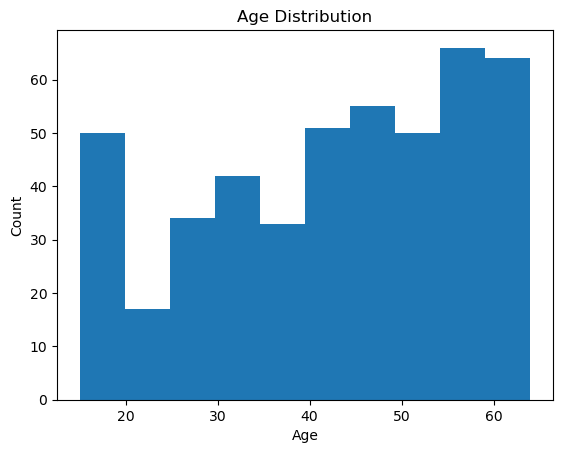

In [7]:
# Create a histogram for the age variable
plt.hist(df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

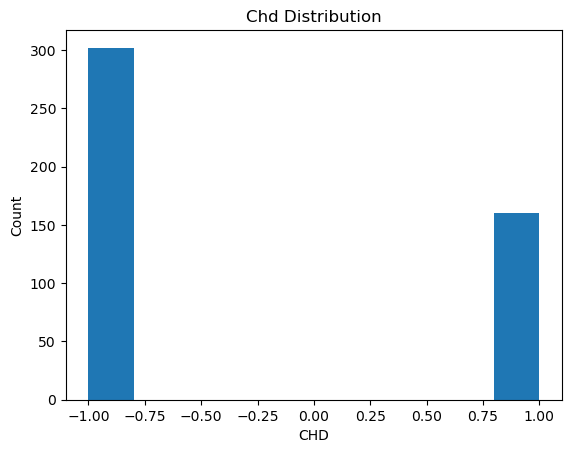

In [8]:
# Create a histogram for the class variable
plt.hist(df['CLASS'])
plt.title('Chd Distribution')
plt.xlabel('CHD')
plt.ylabel('Count')
plt.show()

توزیع مقادیر در متغیر هدف 

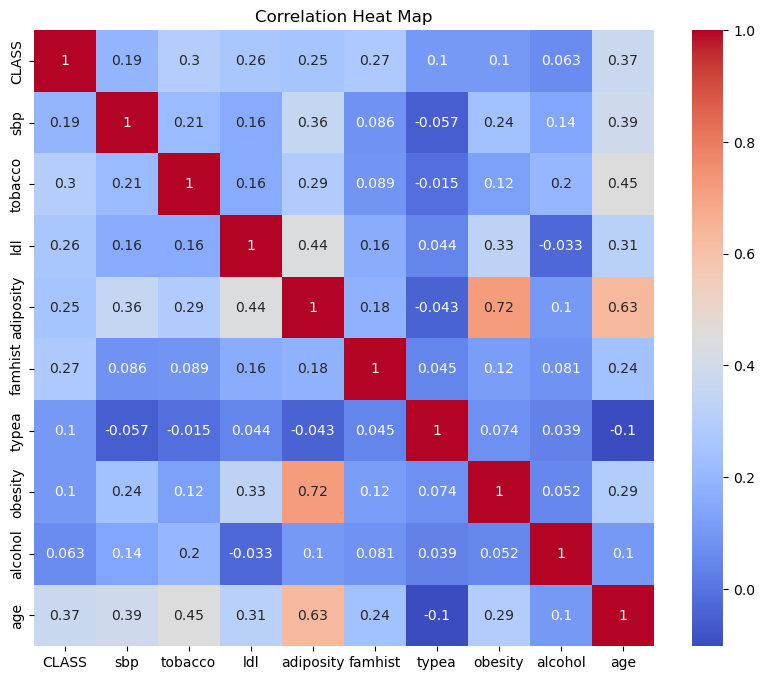

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()


در اینجا با استفاده از هیت مپ همبستگی بین متغیر ها محاسبه و مصور شده است
متغیر های سن و درصد چربی بدن و همچنین متغیر های چاقی بر اساس شاخص توده بدنی و درصد چربی بدن بیشترین همبستگی را با هم داشته اند

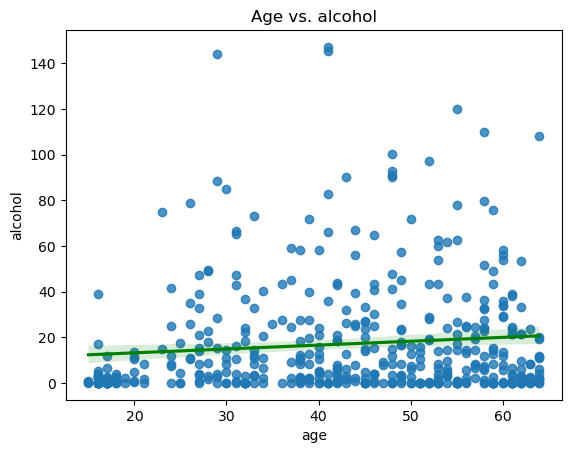

In [9]:
sns.regplot(data=df, x='age', y='alcohol',line_kws={'color': 'green'})
plt.title('Age vs. alcohol')
plt.show()

مصرف الکل با سن مقدار کمی همبستگی خطی دارد

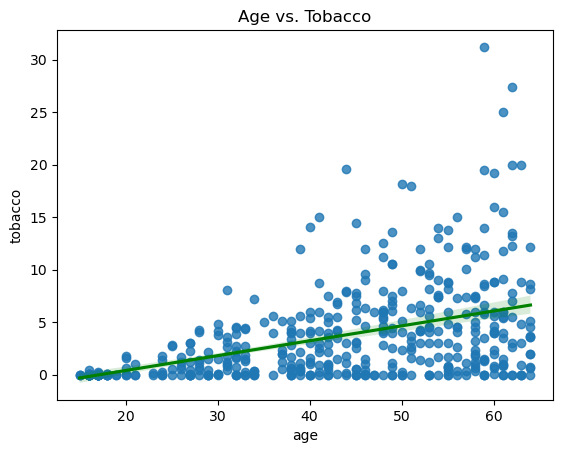

In [10]:
sns.regplot(data=df, x='age', y='tobacco',line_kws={'color': 'green'})
plt.title('Age vs. Tobacco')
plt.show()

مصرف تنباکو با سن دارای همبستگی خطی است

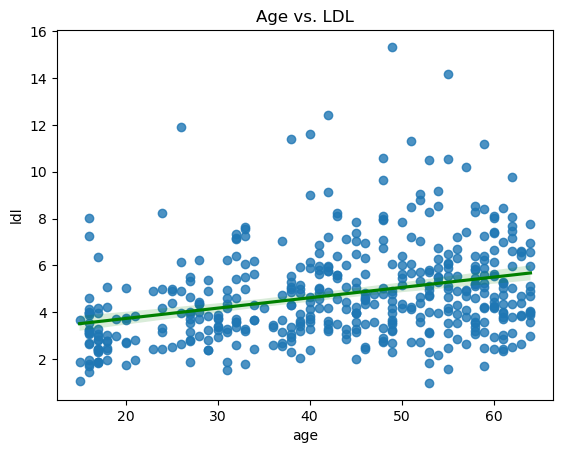

In [11]:
sns.regplot(data=df, x='age', y='ldl',line_kws={'color': 'green'})
plt.title('Age vs. LDL')
plt.show()

کلسترول با چگالی کم با سن همبستگی خطی دارد

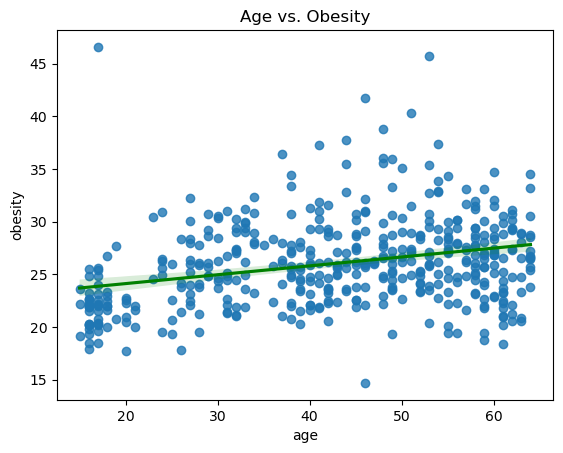

In [12]:
sns.regplot(data=df, x='age', y='obesity',line_kws={'color': 'green'})
plt.title('Age vs. Obesity')
plt.show()

سن با چاقی بر اساس شاخص توده بدنی تقریبا همبستگی خطی دارد

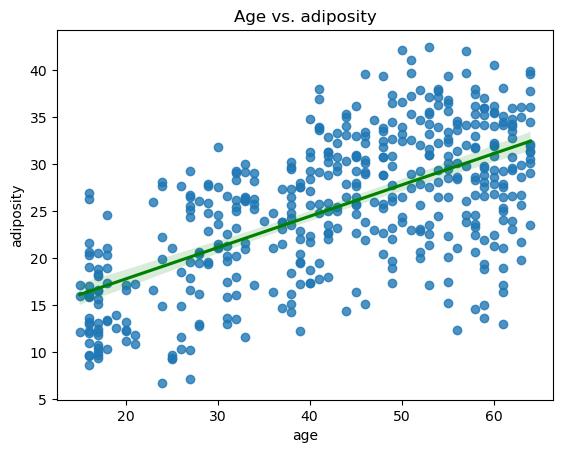

In [13]:
sns.regplot(data=df, x='age', y='adiposity',line_kws={'color': 'green'})
plt.title('Age vs. adiposity')
plt.show()

سن با درصد چربی بدن همبستگی خطی دارد

Text(0.5, 1.0, 'Age vs. systolic blood pressure')

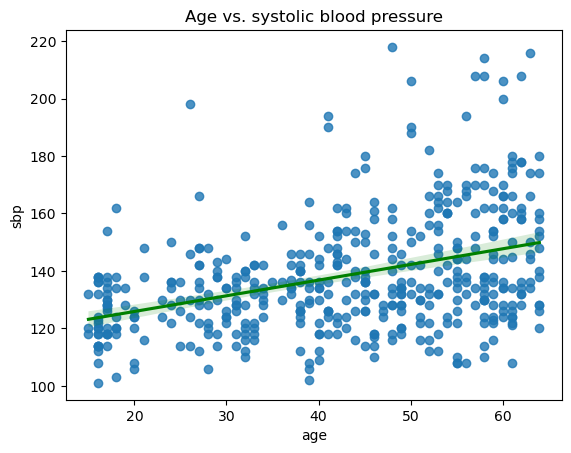

In [14]:
# Create a scatterplot of age vs sbp with regression line
sns.regplot(data=df, x='age', y='sbp',line_kws={'color': 'green'})
plt.title('Age vs. systolic blood pressure')


سن با فشار خون سیستولیک همبستگی خطی دارد

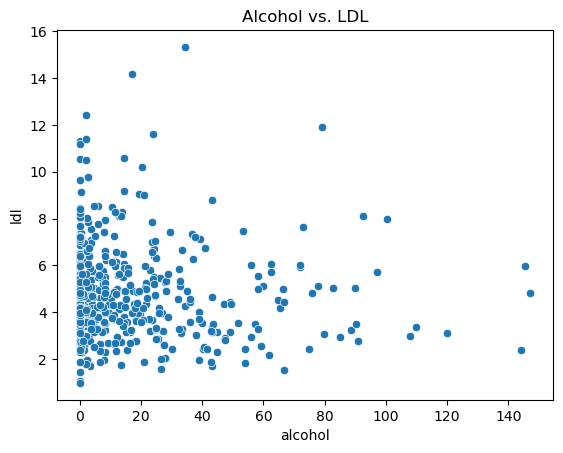

In [15]:
sns.scatterplot(data=df, x='alcohol', y='ldl')
plt.title('Alcohol vs. LDL')
plt.show()

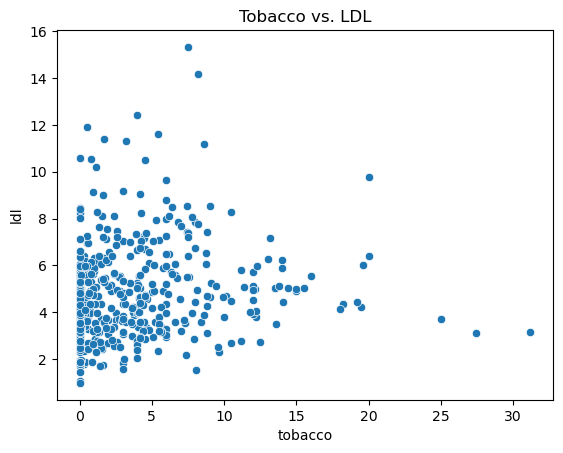

In [16]:
sns.scatterplot(data=df, x='tobacco', y='ldl')
plt.title('Tobacco vs. LDL')
plt.show()

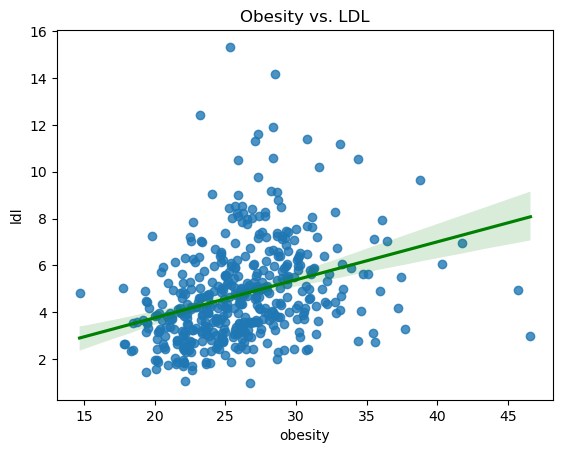

In [17]:
sns.regplot(data=df, x='obesity', y='ldl',line_kws={'color': 'green'})
plt.title('Obesity vs. LDL')
plt.show()

چاقی بر اساس شاخص توده بدنی با کلسترول کم چگالی همبستگی خطی دارد

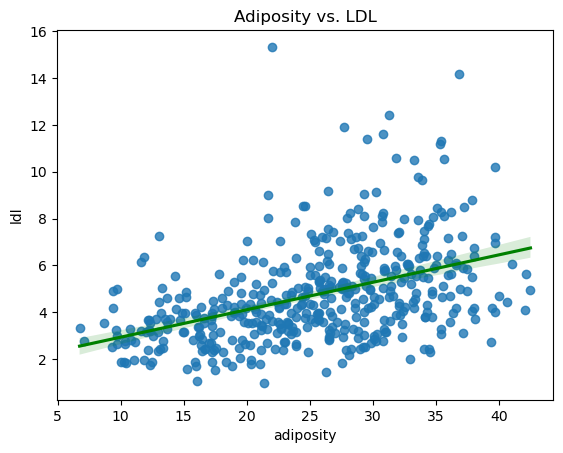

In [18]:
sns.regplot(data=df, x='adiposity', y='ldl',line_kws={'color': 'green'})
plt.title('Adiposity vs. LDL')
plt.show()

درصد چربی بدن با کلسترول کم چگالی همبستگی خطی دارد

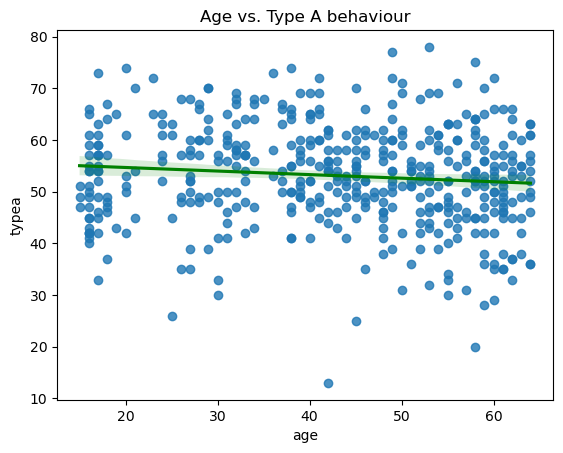

In [19]:
sns.regplot(data=df, x='age', y='typea',line_kws={'color': 'green'})
plt.title('Age vs. Type A behaviour')
plt.show()

سن و رفتار تایپ آ تقریبا همبستگی خطی منفی دارند

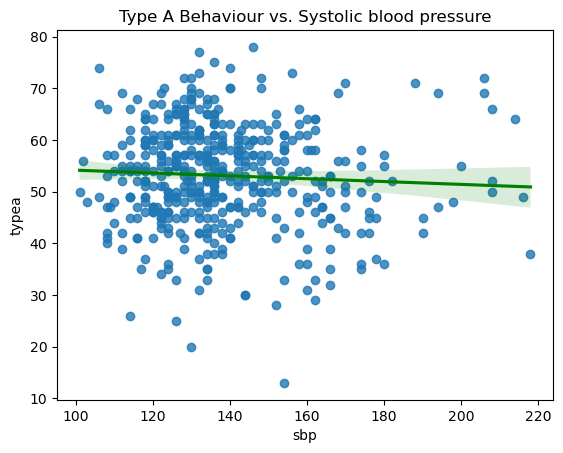

In [20]:
sns.regplot(data=df, x='sbp', y='typea',line_kws={'color': 'green'})
plt.title('Type A Behaviour vs. Systolic blood pressure')
plt.show()

فشار خون سیستولیک با رفتار تایپ آ تقریبا فاقد همبستگی است

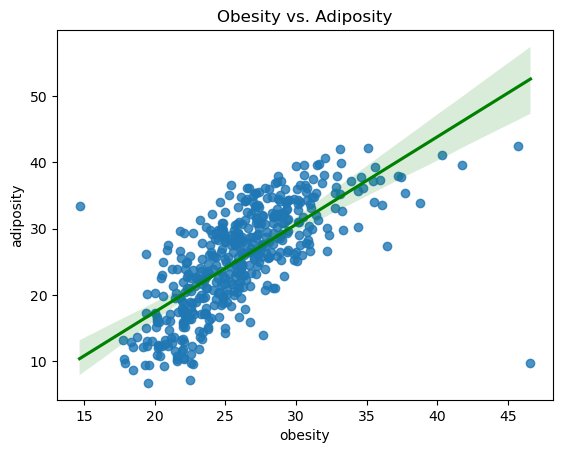

In [6]:
sns.regplot(data=df, x='obesity', y='adiposity',line_kws={'color': 'green'})
plt.title('Obesity vs. Adiposity')
plt.show()

درصد چربی بدن و چاقی بر اساس شاخص توده بدنی نیز دارای همبستگی بسیار بالایی هستند

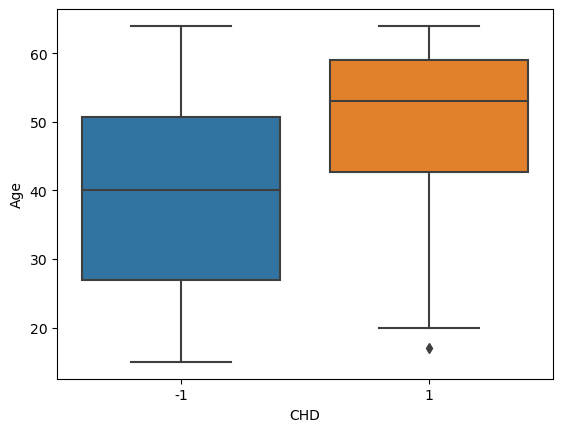

In [21]:
sns.boxplot(x='CLASS', y='age', data=df)
plt.xlabel('CHD')
plt.ylabel('Age')
plt.show()

آن دسته از مواردی که دارای بیماری قلبی کرونری هستند معمولا سن بالاتری دارند

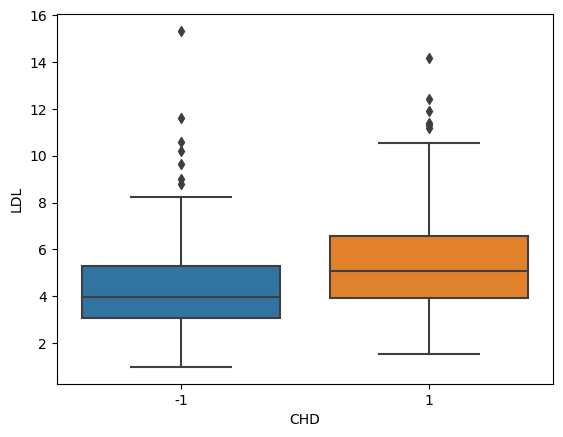

In [22]:
sns.boxplot(x='CLASS', y='ldl', data=df)
plt.xlabel('CHD')
plt.ylabel('LDL')
plt.show()

در میان مواردی که بیماری قلبی کرونری داشته اند میزان کلسترول کم چگالی میانه بالاتری داشته

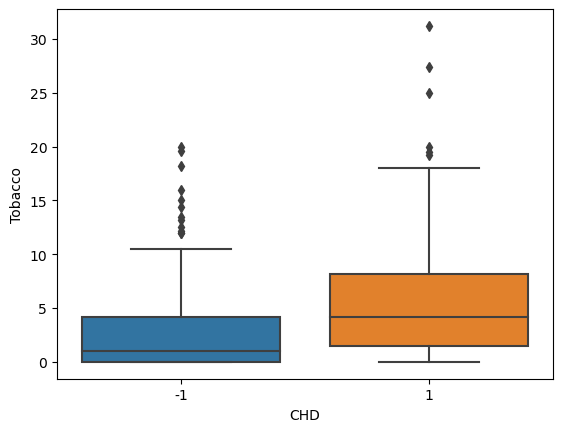

In [23]:
sns.boxplot(x='CLASS', y='tobacco', data=df)
plt.xlabel('CHD')
plt.ylabel('Tobacco')
plt.show()

در میان افراد دارای بیماری قلبی مصرف تنباکو بیشتر بوده

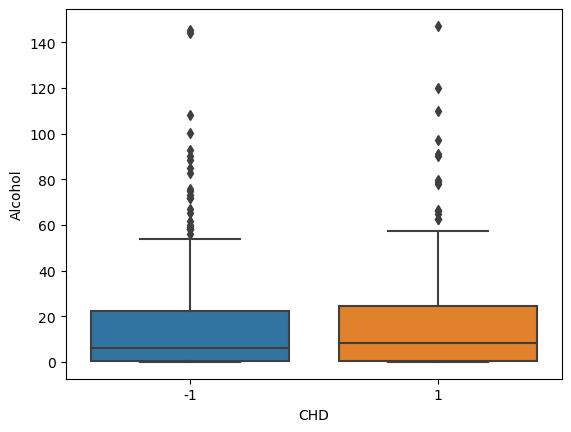

In [24]:
sns.boxplot(x='CLASS', y='alcohol', data=df)
plt.xlabel('CHD')
plt.ylabel('Alcohol')
plt.show()

در بین افراد سالم و افراد دارای بیماری قلبی میزان مصرف الکل تقریبا یکسان بوده ولی افراد با بیماری قلبی میانه مقداری بالاتر است

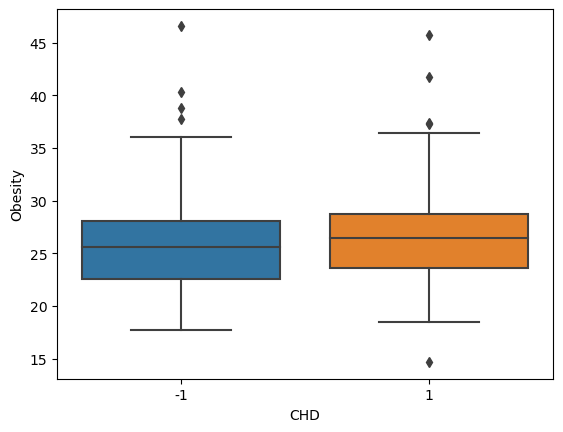

In [25]:
sns.boxplot(x='CLASS', y='obesity', data=df)
plt.xlabel('CHD')
plt.ylabel('Obesity')
plt.show()

در میان افراد دارای بیماری مقدار شاخص توده بدنی اندکی میانه بالاتری دارد

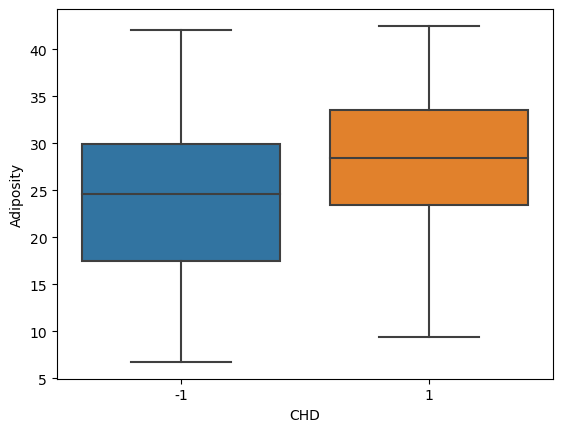

In [26]:
sns.boxplot(x='CLASS', y='adiposity', data=df)
plt.xlabel('CHD')
plt.ylabel('Adiposity')
plt.show()

افراد دارای بیماری قلبی درصد چربی بالاتری نسبت به افراد سالم داشته اند

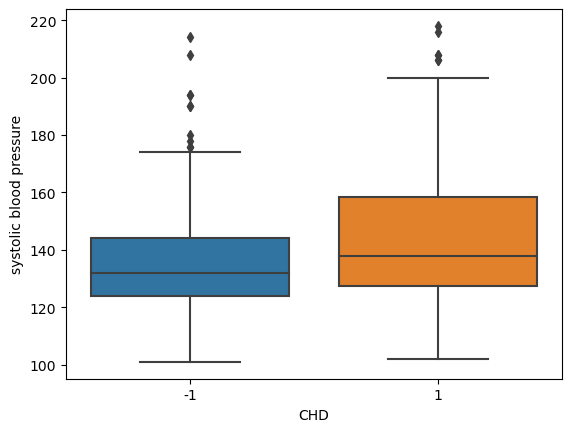

In [27]:
sns.boxplot(x='CLASS', y='sbp', data=df)
plt.xlabel('CHD')
plt.ylabel('systolic blood pressure')
plt.show()

در میان افراد دارای بیماری قلبی، افرادی با فشار خون سیتسولیک بسیار بالاتر نسبت به افراد سالم وجود داشته اند

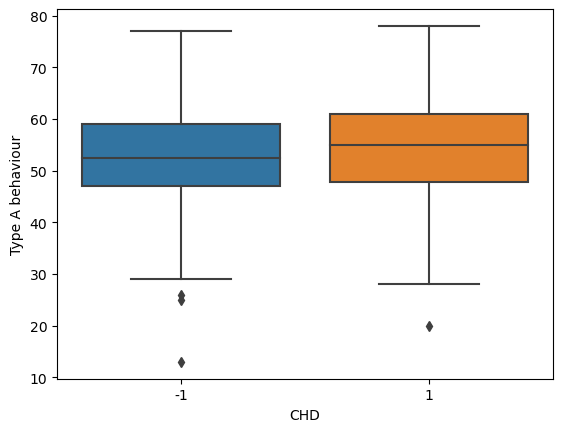

In [28]:
sns.boxplot(x='CLASS', y='typea', data=df)
plt.xlabel('CHD')
plt.ylabel('Type A behaviour')
plt.show()

در میان افراد دارای بیماری قلبی میانه رفتار تایپ آ مقداری بالاتر است

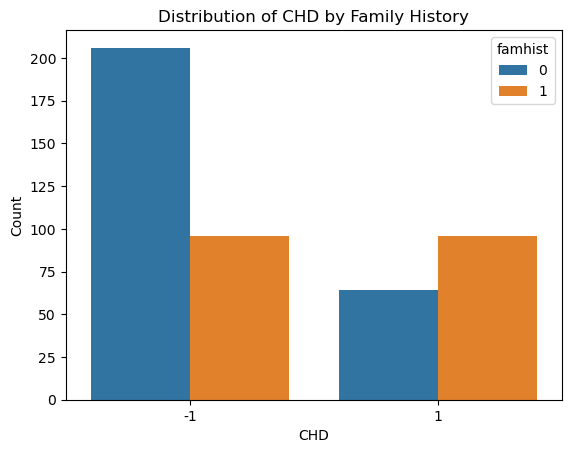

In [29]:
sns.countplot(x='CLASS', hue='famhist', data=df)
plt.title('Distribution of CHD by Family History')
plt.xlabel('CHD')
plt.ylabel('Count')
plt.show()

اکثر افرادی که سالم هستند فاقد سابقه خانوادگی بیماری های قلبی هستند ولی در بین کسانی که بیماری دارند نصف بیشتر آنها سابقه خانوادگی دارند

نتیجه بخش تحلیل اکتشافی داده: بین سابقه خانوادگی با احتمال بیماری فرد رابطه مستقیمی برقرار است، رفتار تایپ آ به مقدار کمی در افراد بیمار بیشتر بوده، افراد بیمار فشار خون های بالاتری نسبت به افراد سالم داشته اند، افراد بیمار درصد چربی بالاتری داشته اند ولی این مقدار در شاخص توده بدنی کمتر است، مصرف الکل در هر دو دسته تقریبا یکسان بوده ولی مصرف تنباکوی افراد بیمار بیشتر بوده، کلسترول کم چگالی نیز در افراد بیمار به صورت چشمگیری بیشتر از افراد سالم بوده، افراد بیمار نیز معمولا سن بالاتری دارند، بین کلسترول کم چگالی و درصد چربی بدن و همچنین کلسترول کم چگالی و شاخص توده بدنی همبستگی خطی مشاهده میشود با زیاد شدن سن نیز معمولا مصرف تنباکو و الکل و میزان فشار خون و درصد چربی بدن و شاخص توده بدنی بیشتر شده

---

---

# PreProcessing

outlier detection

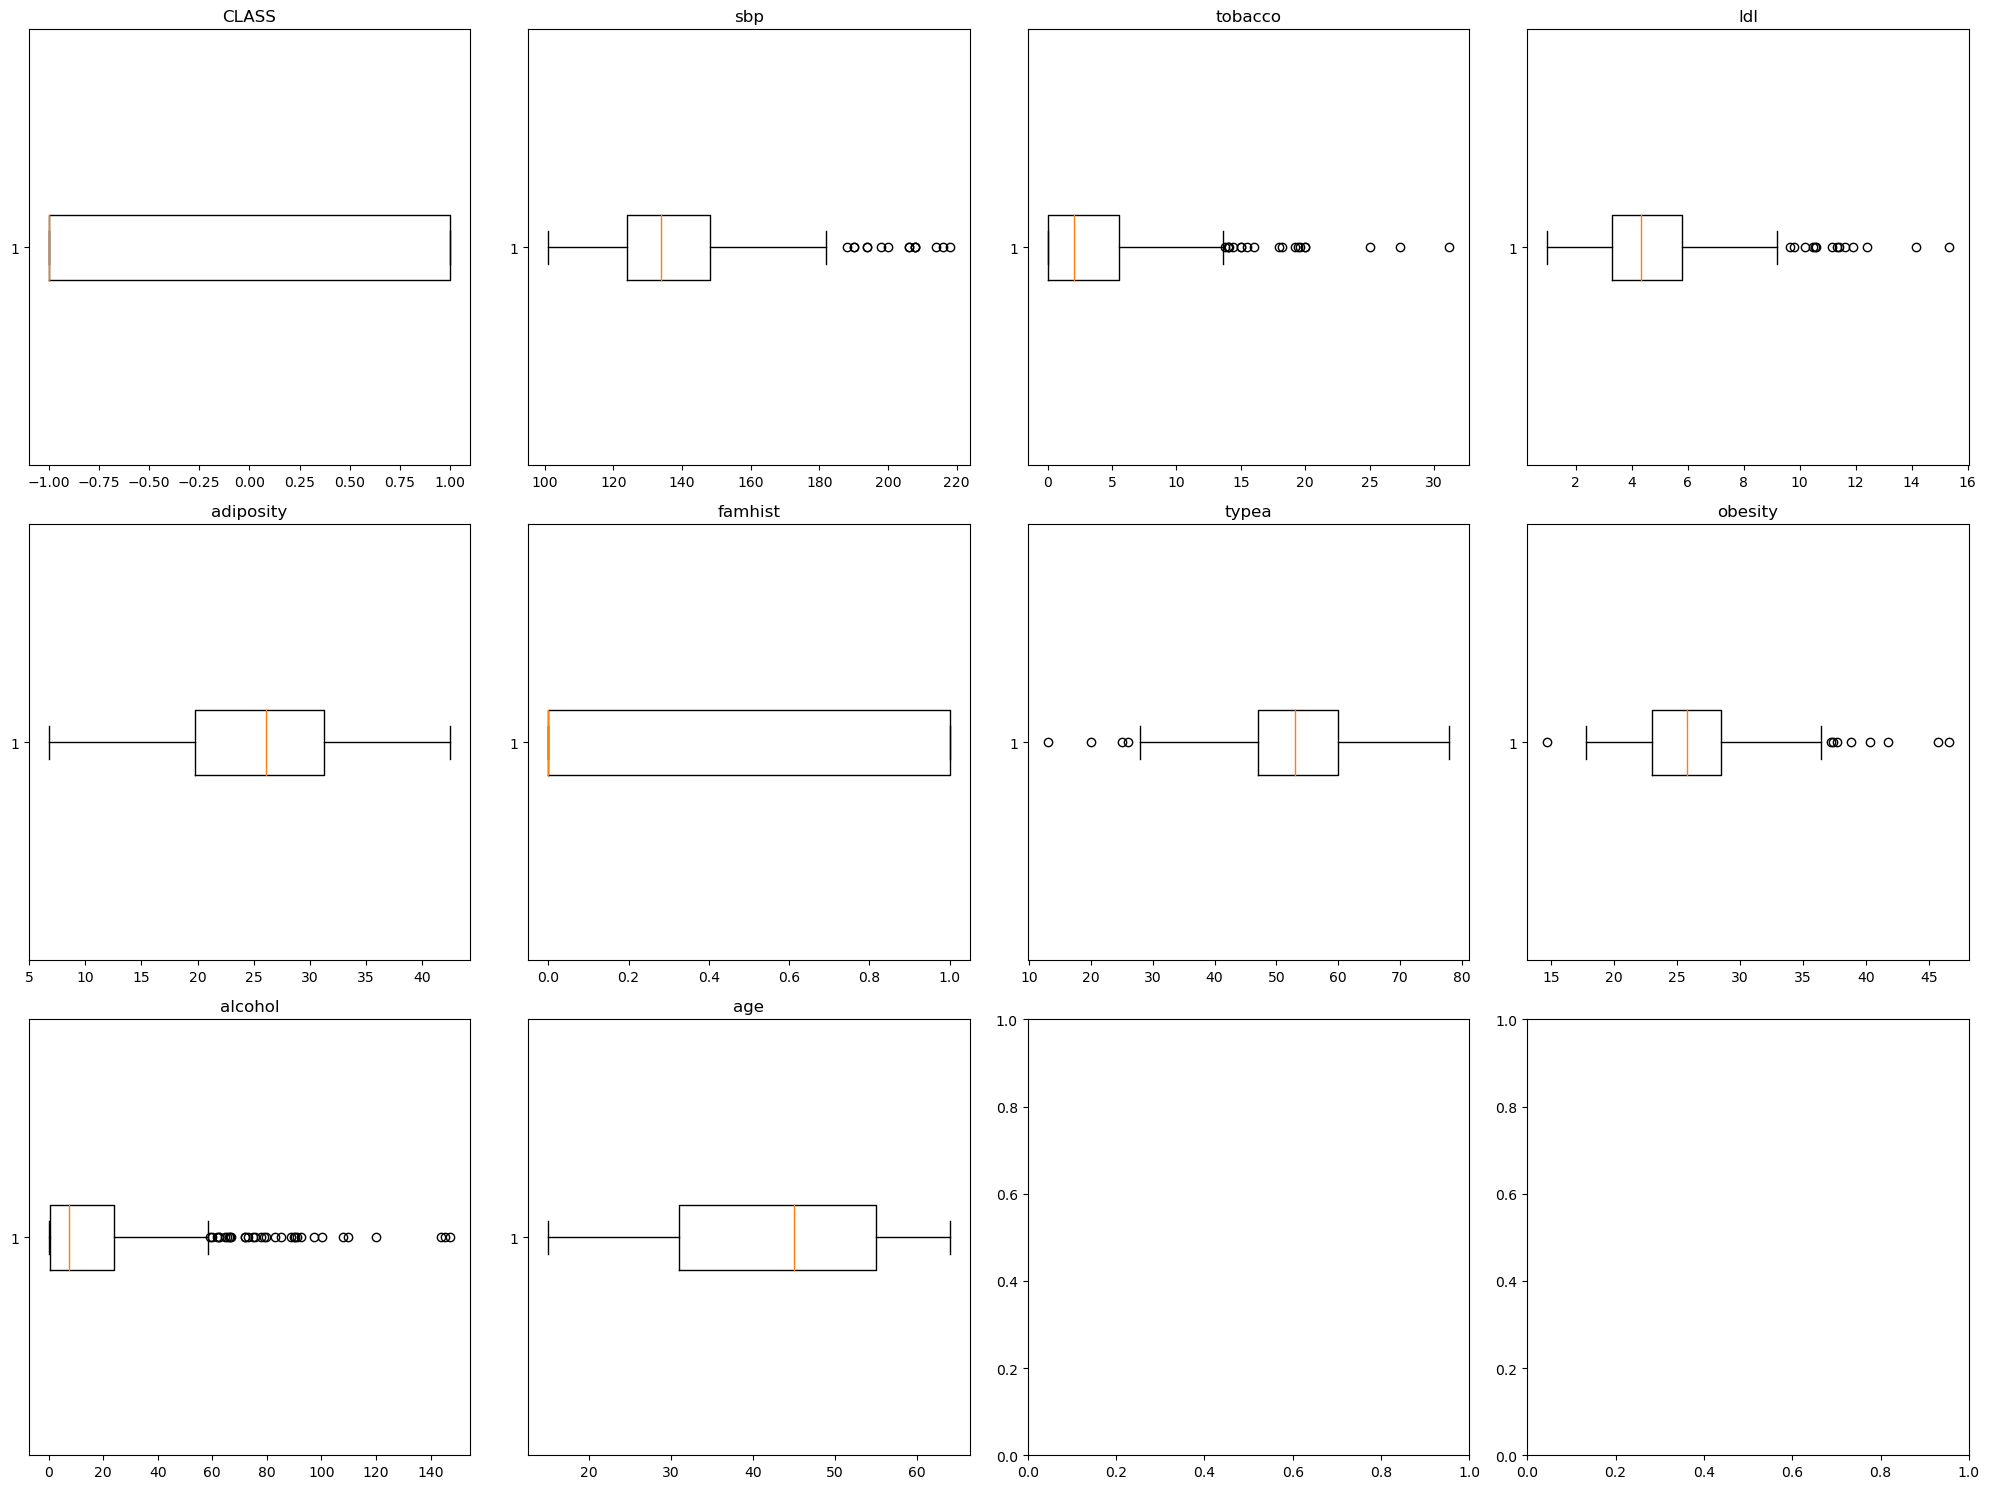

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    if col != 'chd':
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_title(col)
plt.tight_layout()
plt.show()

---

handling missing data

In [31]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [32]:
df_imputed.head()

,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.0,160.0,12.00,5.73,23.11,1.0,49.0,25.30,97.20,52.0
1,1.0,144.0,0.01,4.41,28.61,0.0,55.0,28.87,2.06,63.0
2,-1.0,118.0,0.08,3.48,32.28,1.0,52.0,29.14,3.81,46.0
3,1.0,170.0,7.50,6.41,38.03,1.0,51.0,31.99,24.26,58.0
4,1.0,134.0,13.60,3.50,27.78,1.0,60.0,25.99,57.34,49.0


---

handling outliers

In [33]:
# create a copy of the dataframe
df_wins = df.copy()

# loop over columns (excluding first column)
for col in df_wins.columns[1:]:
    # Winsorize the column at 5% from both ends
    df_wins[col] = winsorize(df_wins[col], limits=[0.05, 0.05])

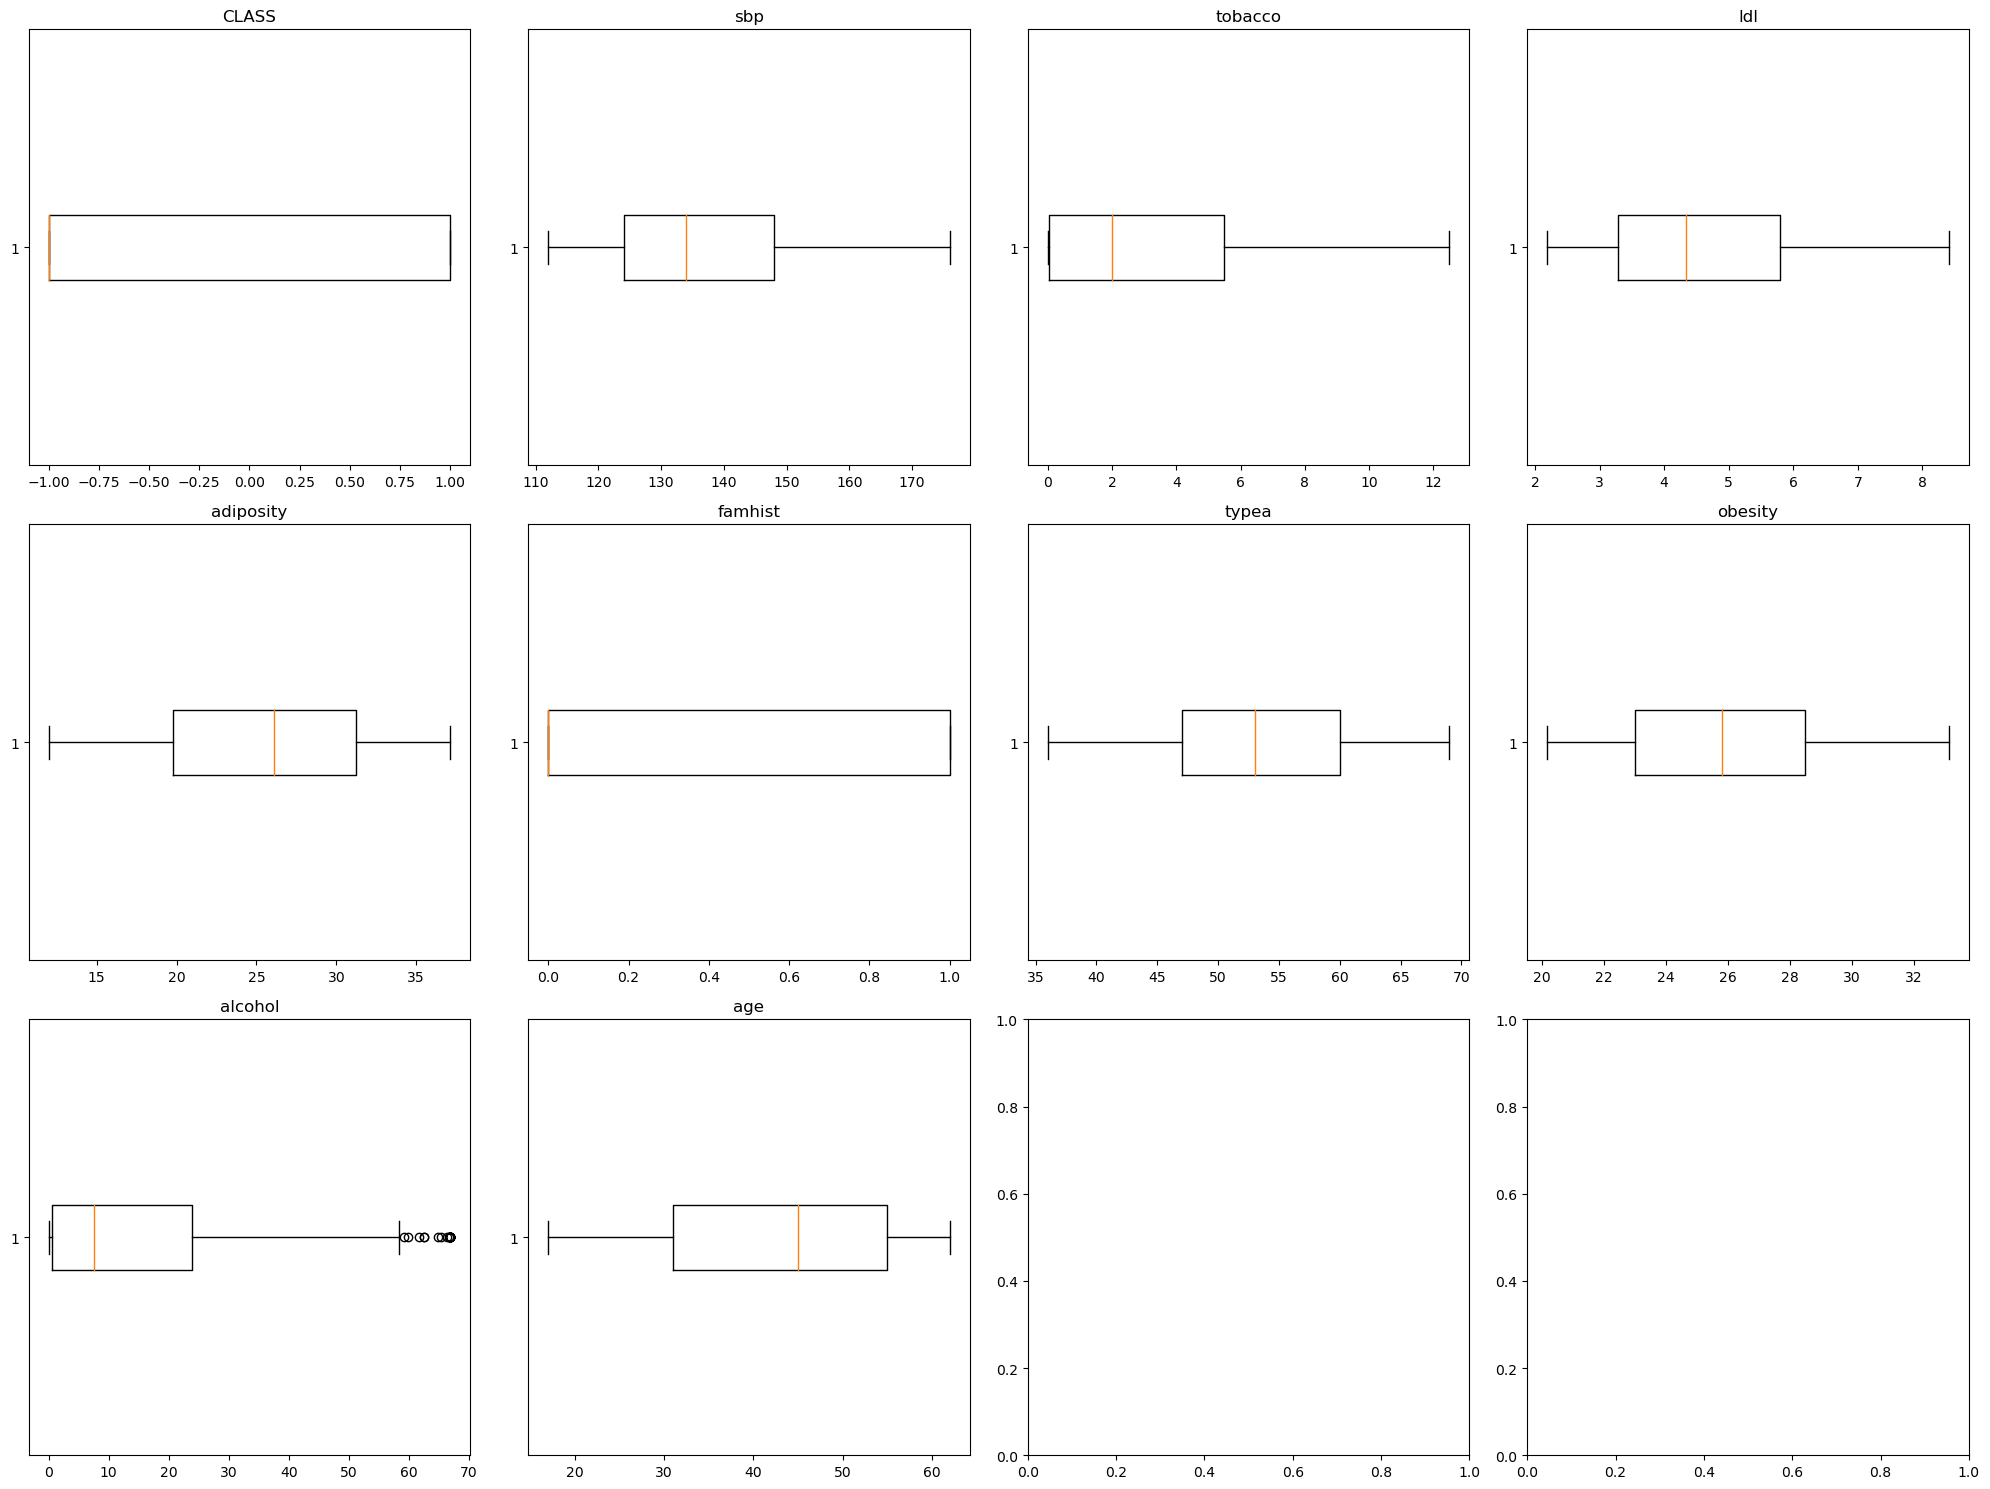

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = axs.flatten()
for i, col in enumerate(df_wins.columns):
    if col != 'chd':
        axs[i].boxplot(df_wins[col], vert=False)
        axs[i].set_title(col)
plt.tight_layout()
plt.show()

In [35]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    column[column < lower_limit] = lower_limit
    column[column > upper_limit] = upper_limit
    return column

handle_outliers_iqr(df_wins.alcohol)

0      58.96625
1       2.06000
2       3.81000
3      24.26000
4      57.34000
         ...   
457     0.00000
458    18.72000
459    26.64000
460    23.97000
461     0.00000
Name: alcohol, Length: 462, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x203524eba30>,
 'caps': [<matplotlib.lines.Line2D at 0x203524ebe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x203524eb790>],
 'medians': [<matplotlib.lines.Line2D at 0x203525143d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20352514670>],
 'means': []}

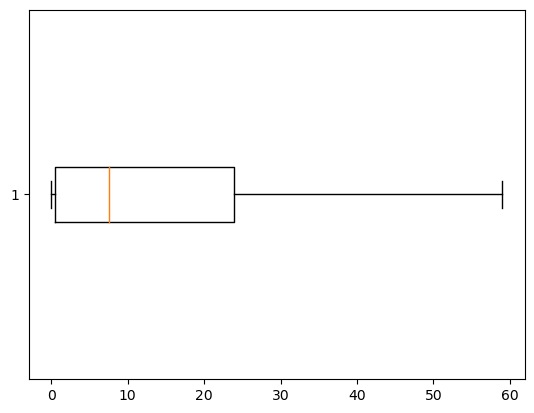

In [36]:
plt.boxplot(df_wins.alcohol, vert=False)

normalizing target variable

In [37]:
df_wins['CLASS'] = df_wins['CLASS'].replace(-1, 0)

In [38]:
df_wins.head()

,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1,160,12.00,5.73,23.11,1,49,25.30,58.96625,52
1,1,144,0.01,4.41,28.61,0,55,28.87,2.06000,62
2,0,118,0.08,3.48,32.28,1,52,29.14,3.81000,46
3,1,170,7.50,6.41,37.12,1,51,31.99,24.26000,58
4,1,134,12.50,3.50,27.78,1,60,25.99,57.34000,49


normalizing the dataset

In [39]:
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df_wins)

# Convert the numpy array to a Pandas DataFrame
df_new = pd.DataFrame(normalized_data, columns=df_wins.columns)

In [40]:
df_new.head()

,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.0,0.75000,0.9600,0.569132,0.442277,1.0,0.393939,0.395528,1.000000,0.777778
1,1.0,0.50000,0.0008,0.356913,0.661226,0.0,0.575758,0.670779,0.034935,1.000000
2,0.0,0.09375,0.0064,0.207395,0.807325,1.0,0.484848,0.691596,0.064613,0.644444
3,1.0,0.90625,0.6000,0.678457,1.000000,1.0,0.454545,0.911334,0.411422,0.911111
4,1.0,0.34375,1.0000,0.210611,0.628185,1.0,0.727273,0.448728,0.972421,0.711111


defining target and input variables

In [41]:
df_new.columns

Index(['CLASS', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age'],
      dtype='object')

In [42]:
x = df_new[['sbp', 'tobacco', 'ldl',
       'adiposity', 'famhist', 'typea', 'obesity', 'alcohol',
       'age']]

In [43]:
y = df_new['CLASS']

spliting and sampeling

In [44]:
#train - 70
#test - 30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)

In [45]:
print('Train set: ',x_train.shape, y_train.shape)
print('Test set: ',x_test.shape, y_test.shape)

Train set:  (323, 9) (323,)
Test set:  (139, 9) (139,)


# Models

## SVM

SVM without using grid search

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [48]:
pred_svm = svm.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
acc_svm = accuracy_score(y_test, pred_svm)
print("Accuracy is :", acc_svm)

print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Accuracy is : 0.7122302158273381
[[79 12]
 [28 20]]
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        91
         1.0       0.62      0.42      0.50        48

    accuracy                           0.71       139
   macro avg       0.68      0.64      0.65       139
weighted avg       0.70      0.71      0.70       139



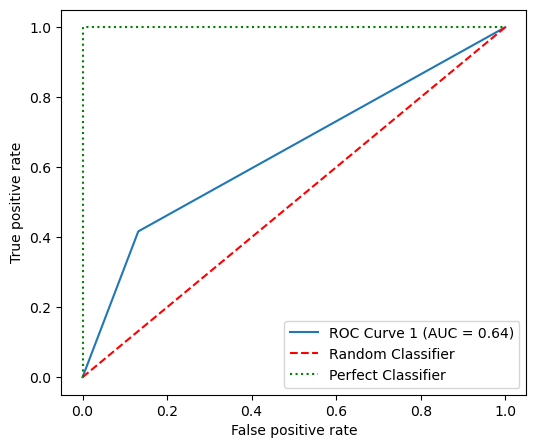

In [51]:
fpr , tpr , _ = roc_curve(y_test, pred_svm )
auc = roc_auc_score(y_test, pred_svm)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

SVM and grid search

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Initialize the SVM model
svm = SVC()

# Perform grid search with cross-validation
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_svm.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_svm.best_params_)

# Build the SVM model with the best hyperparameters
svm = SVC(**grid_svm.best_params_)
svm.fit(x_train, y_train)

# Predict the target variable of test data
pred_svm = svm.predict(x_test)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [53]:
acc_svm = accuracy_score(y_test, pred_svm)
print("Accuracy is :", acc_svm)

print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Accuracy is : 0.6906474820143885
[[73 18]
 [25 23]]
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        91
         1.0       0.56      0.48      0.52        48

    accuracy                           0.69       139
   macro avg       0.65      0.64      0.64       139
weighted avg       0.68      0.69      0.68       139



accuracy becomes worse, how odd

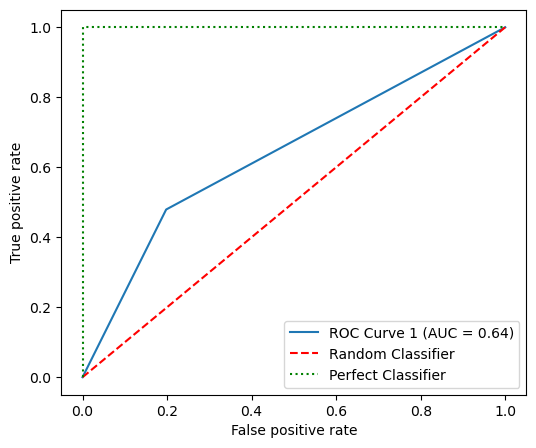

In [54]:
fpr , tpr , _ = roc_curve(y_test, pred_svm )
auc = roc_auc_score(y_test, pred_svm)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

SVM and grid search but with a little different approach

In [55]:
param_dict = {"C": [1, 10, 50, 100, 200, 300],
             "kernel" :['lnear', 'poly'],
              "gamma": [0.001, 0.01, 0.1, 1]
}

grid_svm = GridSearchCV(svm, param_grid = param_dict, verbose = 1, n_jobs = -1)
grid_svm.fit(x_train, y_train)

print('best parameter set is:',grid_svm.best_params_)
best_C = grid_svm.best_params_["C"]
best_kernel = grid_svm.best_params_['kernel']
best_gamma = grid_svm.best_params_['gamma']

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best parameter set is: {'C': 50, 'gamma': 0.1, 'kernel': 'poly'}


In [56]:
svm = SVC(C = best_C, kernel = best_kernel, gamma = best_gamma )
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)

print('with best parameter set used for SVM: ')
acc_svm = accuracy_score(y_test, pred_svm)
print("Accuracy is :", acc_svm)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

with best parameter set used for SVM: 
Accuracy is : 0.7266187050359713
[[80 11]
 [27 21]]
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81        91
         1.0       0.66      0.44      0.53        48

    accuracy                           0.73       139
   macro avg       0.70      0.66      0.67       139
weighted avg       0.72      0.73      0.71       139



accuracy becomes better this time

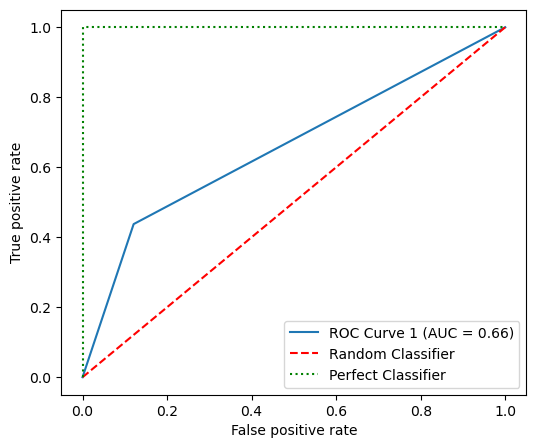

In [57]:
fpr , tpr , _ = roc_curve(y_test, pred_svm )
auc = roc_auc_score(y_test, pred_svm)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

## KNN

knn without grid search

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=6, metric='manhattan', p=2)
knn.fit(x_train , y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [60]:
Yhat = knn.predict(x_test)
print (Yhat[0:5])
print (y[0:5])

[0. 0. 0. 0. 0.]
0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: CLASS, dtype: float64


In [61]:
from sklearn import metrics
print ('train accuracy:', metrics.accuracy_score(y_train, knn.predict(x_train)))
print ('test accuracy:', metrics.accuracy_score(y_test, Yhat))

train accuracy: 0.7430340557275542
test accuracy: 0.6762589928057554


In [62]:
neighbors= np.arange(1,30)

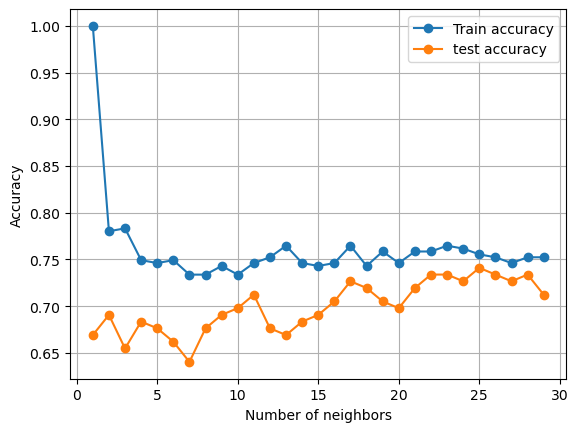

In [63]:
from sklearn.neighbors import KNeighborsClassifier
neighbors= np.arange(1,30)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i]=knn_model.score(x_train, y_train)
    test_accuracy[i]=knn_model.score(x_test, y_test)  
    
plt.plot(neighbors, train_accuracy, label='Train accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='test accuracy', marker='o')  
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Text(0, 0.5, 'Mean Error')

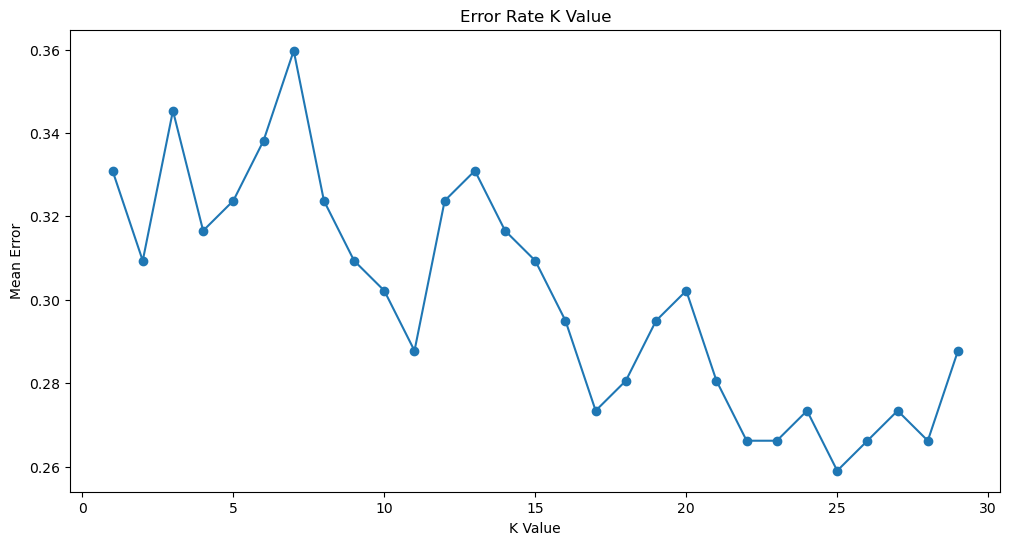

In [64]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, marker='o')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [65]:
from sklearn.metrics import classification_report
acc_knn = accuracy_score(y_test, Yhat)
print("Accuracy is :", acc_knn)
print(classification_report(y_test, Yhat))
print(confusion_matrix(y_test, Yhat))

Accuracy is : 0.6762589928057554
              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78        91
         1.0       0.56      0.31      0.40        48

    accuracy                           0.68       139
   macro avg       0.63      0.59      0.59       139
weighted avg       0.65      0.68      0.65       139

[[79 12]
 [33 15]]


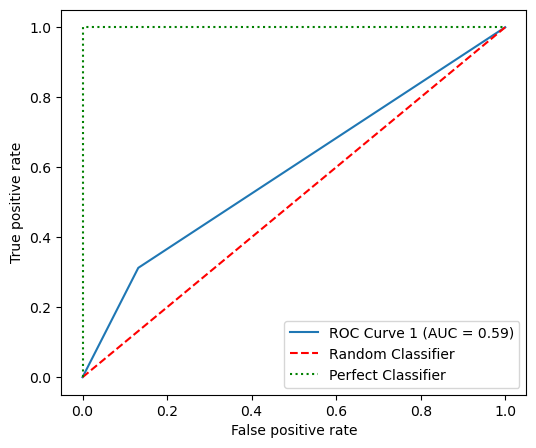

In [66]:
fpr , tpr , _ = roc_curve(y_test, Yhat )
auc = roc_auc_score(y_test, Yhat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

knn with grid search

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn = KNeighborsClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Build the KNN model with the best hyperparameters found
knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(x_train, y_train)
Yhat = knn.predict(x_test)
acc_knn = accuracy_score(y_test, Yhat)
print("Accuracy is :", acc_knn)
print(classification_report(y_test, Yhat))
print(confusion_matrix(y_test, Yhat))

Best hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy is : 0.6762589928057554
              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75        91
         1.0       0.53      0.54      0.54        48

    accuracy                           0.68       139
   macro avg       0.64      0.64      0.64       139
weighted avg       0.68      0.68      0.68       139

[[68 23]
 [22 26]]


results are same

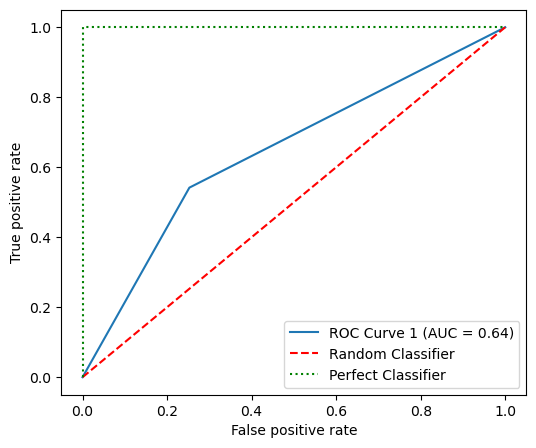

In [68]:
fpr , tpr , _ = roc_curve(y_test, Yhat )
auc = roc_auc_score(y_test, Yhat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

##  decision tree

decision tree without grid search

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc=dtc.predict(x_test)

In [71]:
from sklearn import metrics
metrics.accuracy_score(y_test, predict_dtc)

0.60431654676259

In [72]:
from sklearn.tree import plot_tree

[Text(0.3890165441176471, 0.9615384615384616, 'age <= 0.478\ngini = 0.453\nsamples = 323\nvalue = [211, 112]\nclass = 0'),
 Text(0.14154411764705882, 0.8846153846153846, 'tobacco <= 0.403\ngini = 0.193\nsamples = 120\nvalue = [107, 13]\nclass = 0'),
 Text(0.09926470588235294, 0.8076923076923077, 'sbp <= 0.016\ngini = 0.17\nsamples = 117\nvalue = [106, 11]\nclass = 0'),
 Text(0.058823529411764705, 0.7307692307692307, 'tobacco <= 0.043\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = 0'),
 Text(0.04411764705882353, 0.6538461538461539, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0'),
 Text(0.07352941176470588, 0.6538461538461539, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.13970588235294118, 0.7307692307692307, 'obesity <= 0.622\ngini = 0.137\nsamples = 108\nvalue = [100, 8]\nclass = 0'),
 Text(0.10294117647058823, 0.6538461538461539, 'alcohol <= 0.767\ngini = 0.087\nsamples = 88\nvalue = [84, 4]\nclass = 0'),
 Text(0.07352941176470588, 0.5769230769230769, 'obe

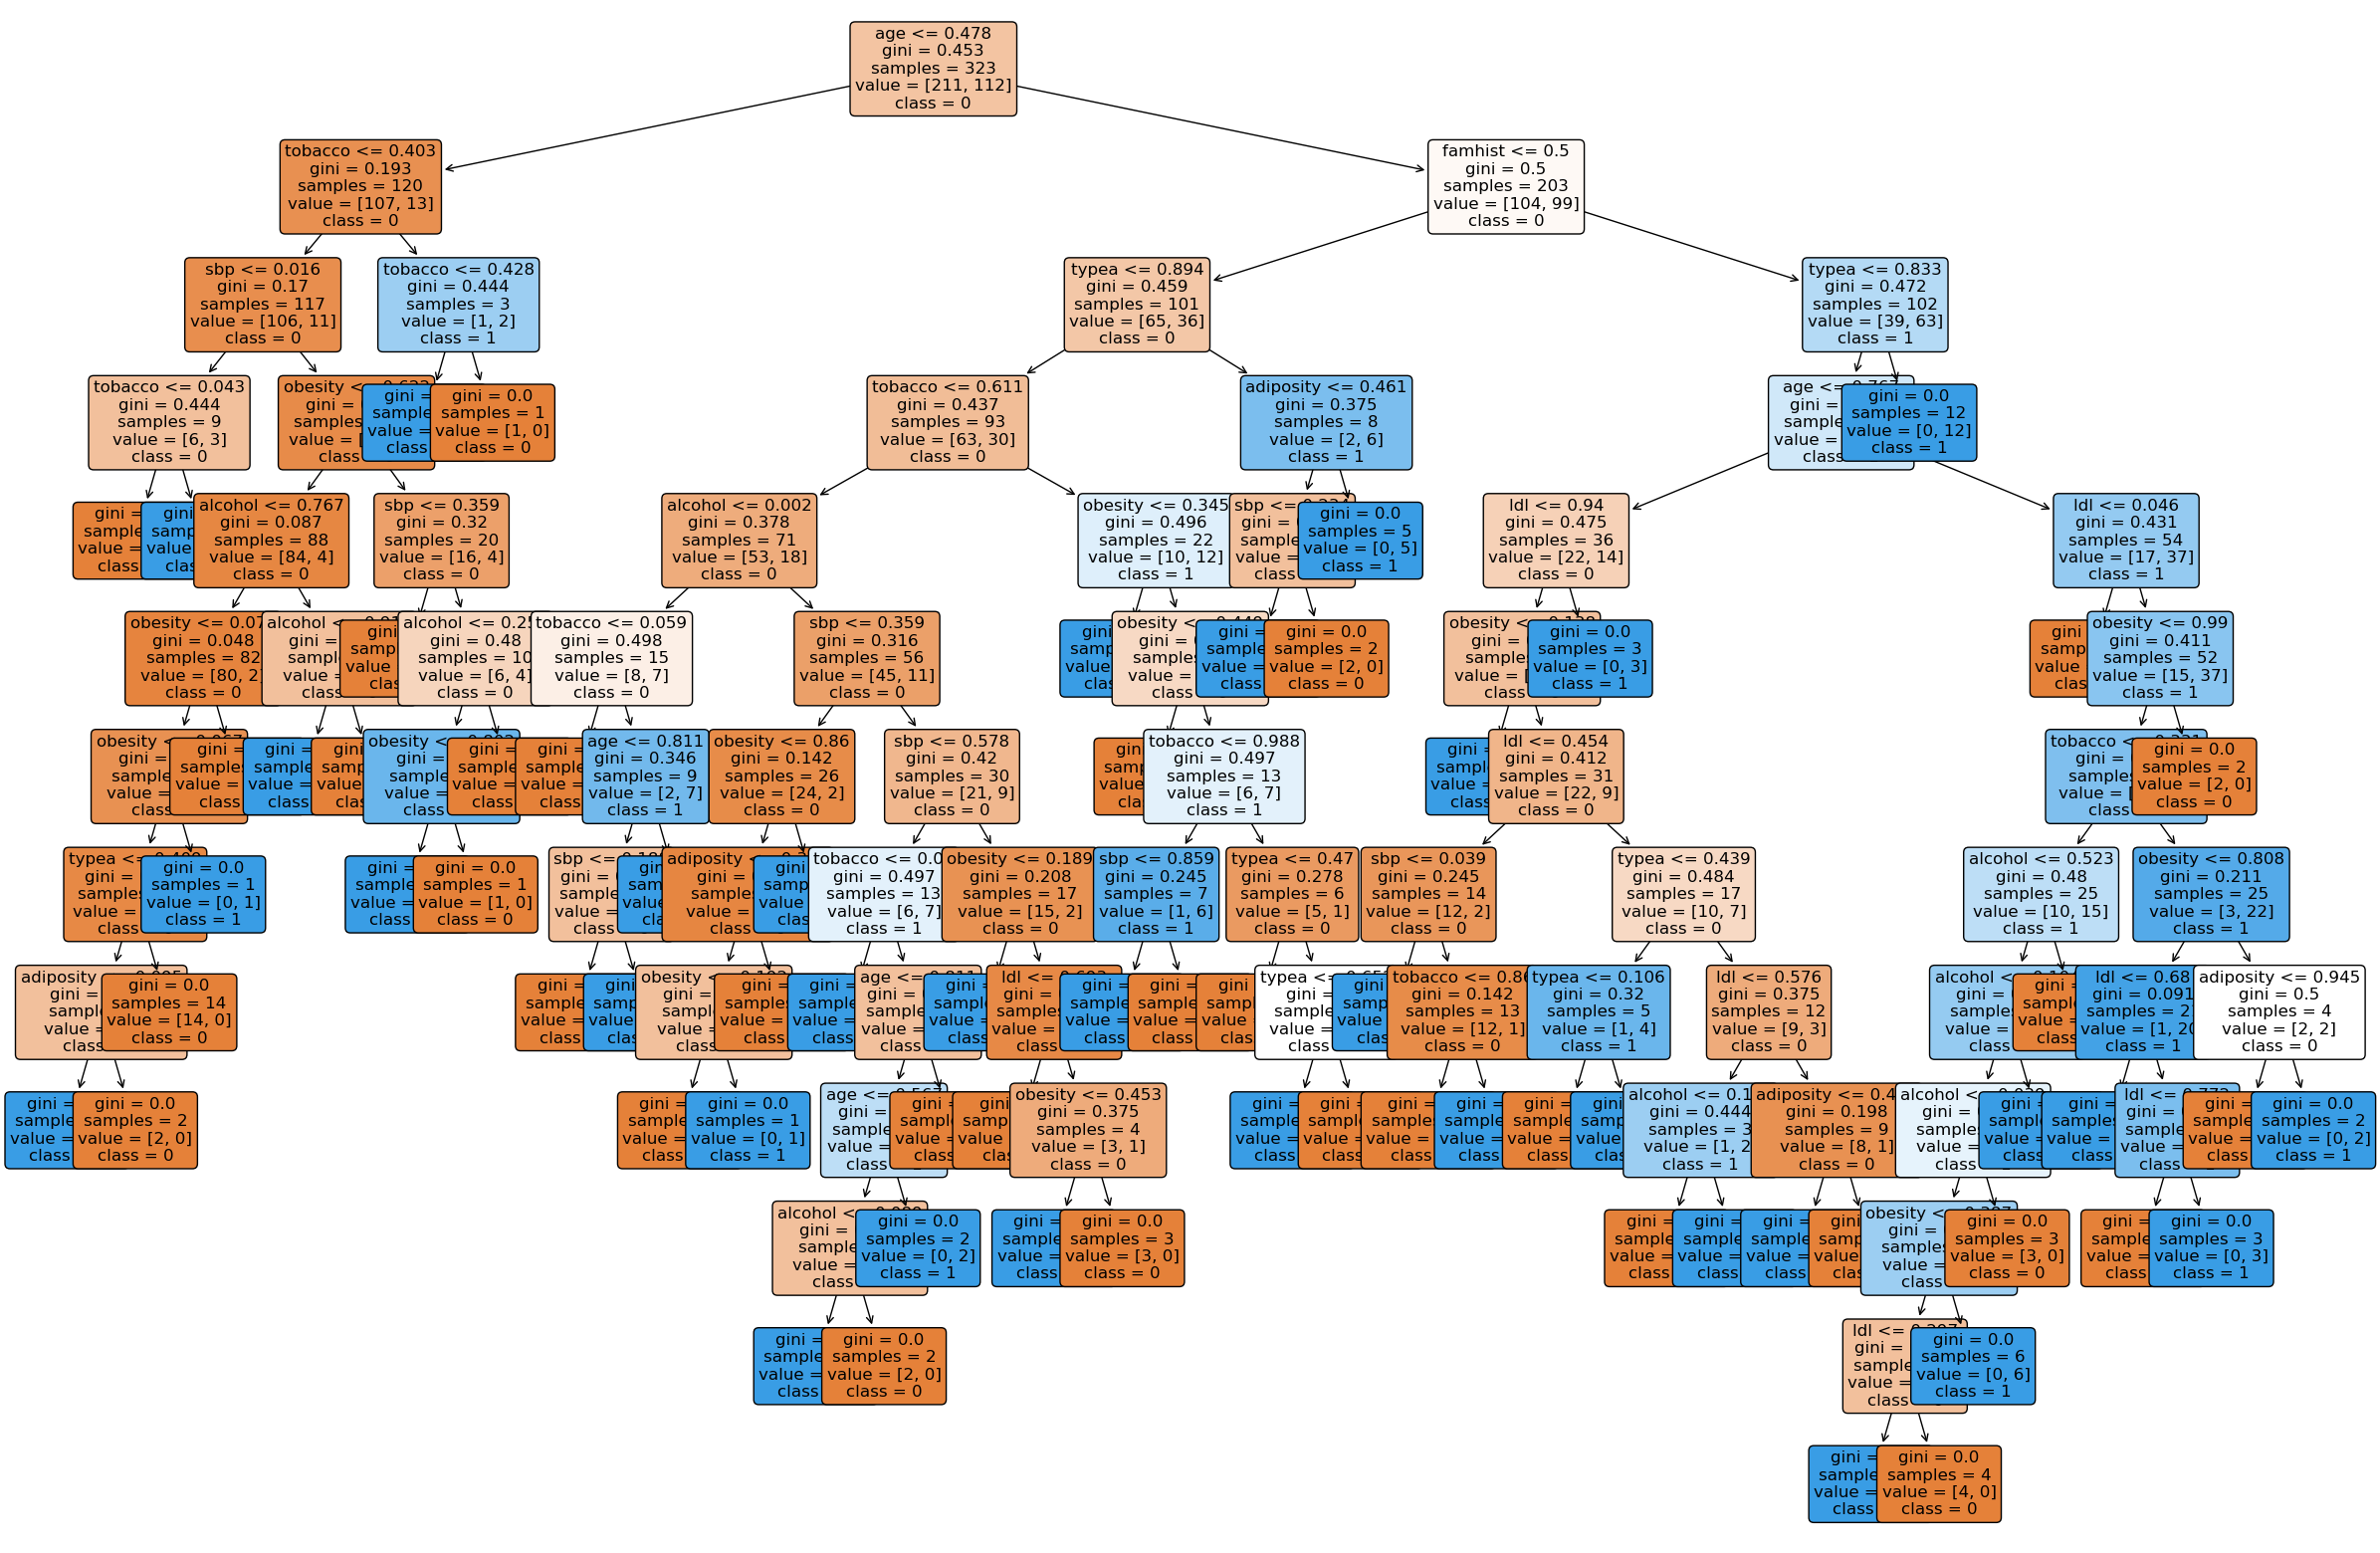

In [73]:
df_features= df.drop(['CLASS'], axis= 1)
dtc_model= DecisionTreeClassifier(criterion='gini', max_depth=8)
dtc_model.fit(x_train,y_train)
plt.figure(figsize = (30, 20))
plot_tree(dtc, feature_names = df_features.columns,
          class_names = ['0', '1'], 
          filled =True, fontsize=12,
          rounded=True, impurity=True) 

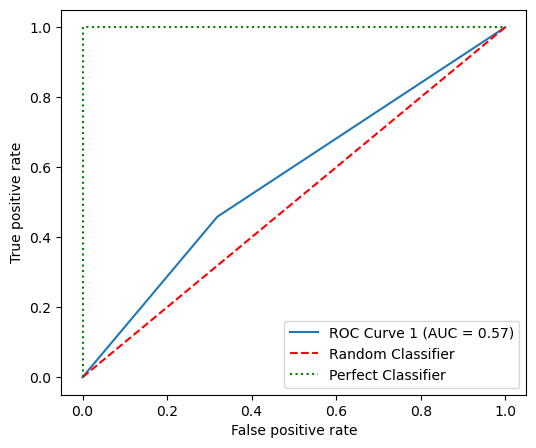

In [74]:
fpr , tpr , _ = roc_curve(y_test, predict_dtc )
auc = roc_auc_score(y_test, predict_dtc)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

decision tree with grid search

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Define the GridSearchCV object
dt_gs = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
dt_gs.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", dt_gs.best_params_)

# Use the best hyperparameters to fit a decision tree model
dt_best = DecisionTreeClassifier(**dt_gs.best_params_)
dt_best.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt_best.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75        91
         1.0       0.55      0.69      0.61        48

    accuracy                           0.70       139
   macro avg       0.68      0.70      0.68       139
weighted avg       0.72      0.70      0.70       139



In [76]:
print(confusion_matrix(y_test, y_pred))
metrics.accuracy_score(y_test, y_pred)

[[64 27]
 [15 33]]


0.697841726618705

better accuracy

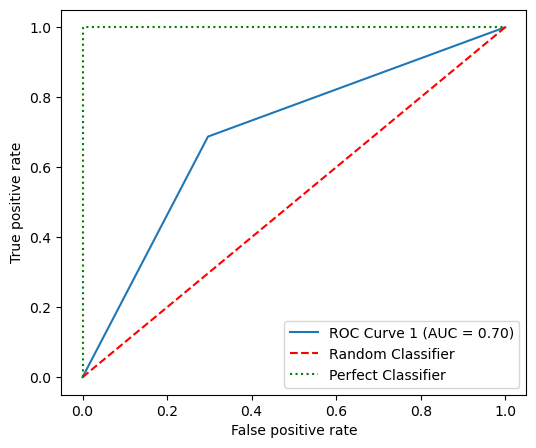

In [77]:
fpr , tpr , _ = roc_curve(y_test, y_pred )
auc = roc_auc_score(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

## Random forest

random forest without grid search

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 3)

rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [80]:
acc_rfc = accuracy_score(y_test, pred_rfc)
print(" Accuracy is :", acc_rfc)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

 Accuracy is : 0.6690647482014388
[[76 15]
 [31 17]]
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        91
         1.0       0.53      0.35      0.42        48

    accuracy                           0.67       139
   macro avg       0.62      0.59      0.60       139
weighted avg       0.65      0.67      0.65       139



In [81]:
error_rate=[]
for i in range(1,30):
        iteration_error=[]
        rfc = RandomForestClassifier(n_estimators=i, criterion = 'gini', max_depth = 5)
        
        rfc.fit(x_train,y_train)
        pred_i = rfc.predict(x_test)
        iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))

Text(0, 0.5, 'Error Rate')

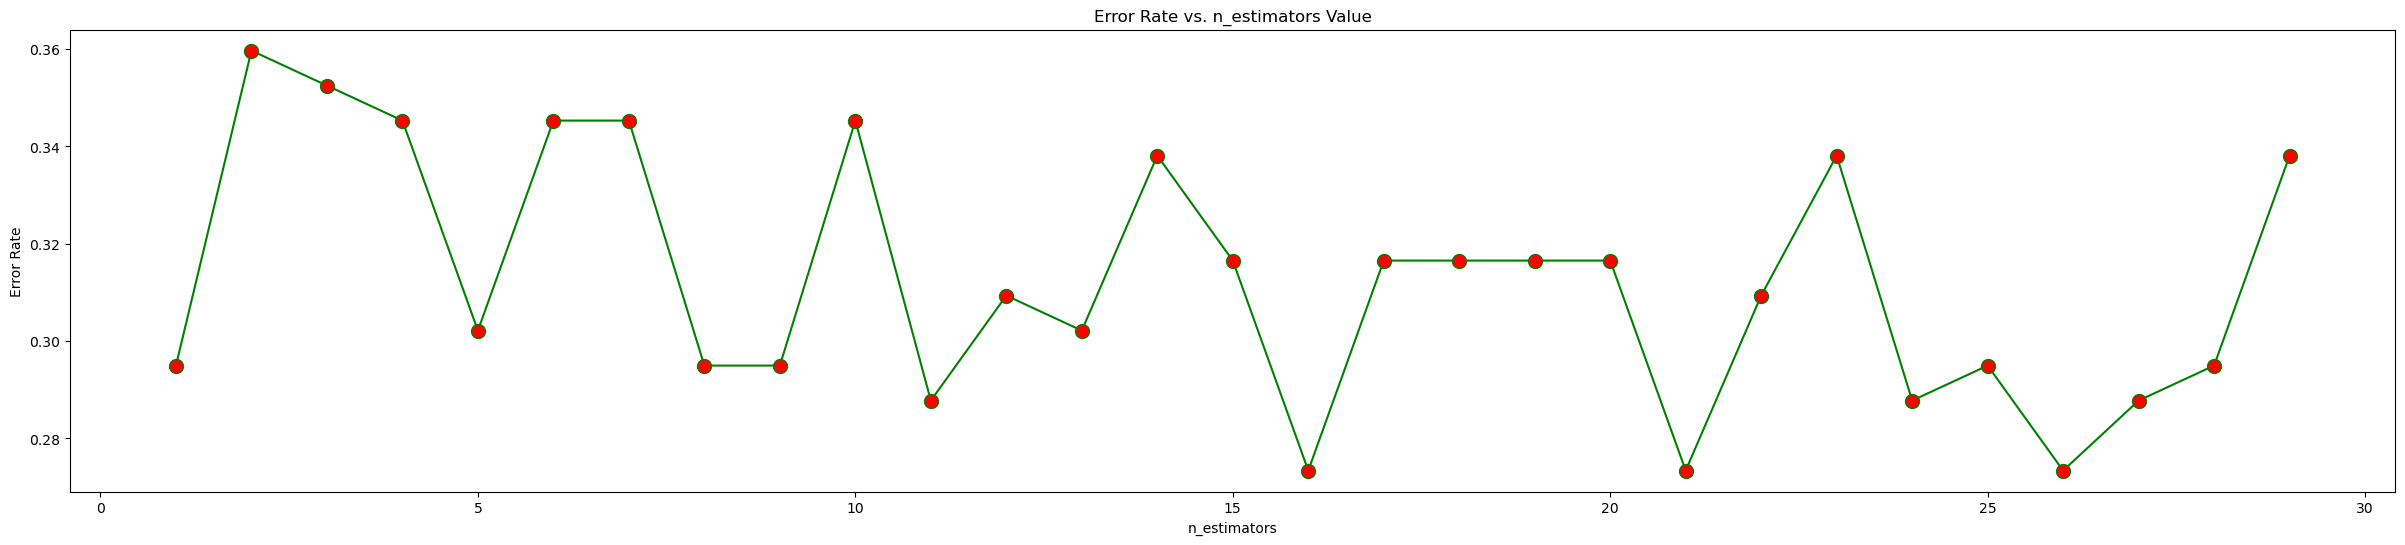

In [82]:
plt.figure(figsize=(30,6))
plt.plot(range(1, 30),error_rate,color='green', linestyle='-', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')

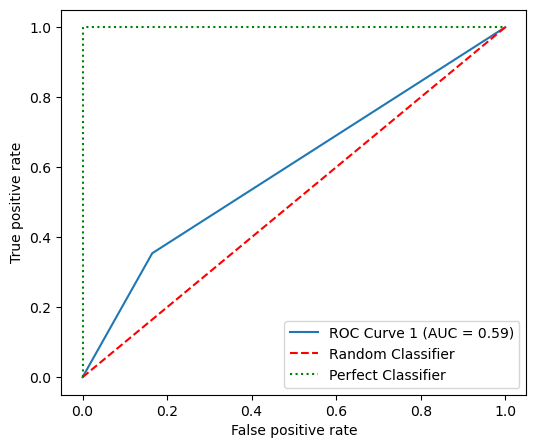

In [83]:
fpr , tpr , _ = roc_curve(y_test, pred_rfc )
auc = roc_auc_score(y_test, pred_rfc)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

random forest with grid search

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rfc = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [10, 100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", rfc_cv.best_params_)

# Fit the model with the best hyperparameters
rfc_best = RandomForestClassifier(**rfc_cv.best_params_)
rfc_best.fit(x_train, y_train)

# Predict using the best model
y_pred = rfc_best.predict(x_test)


Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [85]:
acc_rfc = accuracy_score(y_test, y_pred)
print(" Accuracy is :", acc_rfc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Accuracy is : 0.6690647482014388
[[69 22]
 [24 24]]
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        91
         1.0       0.52      0.50      0.51        48

    accuracy                           0.67       139
   macro avg       0.63      0.63      0.63       139
weighted avg       0.67      0.67      0.67       139



accuracy gets worse

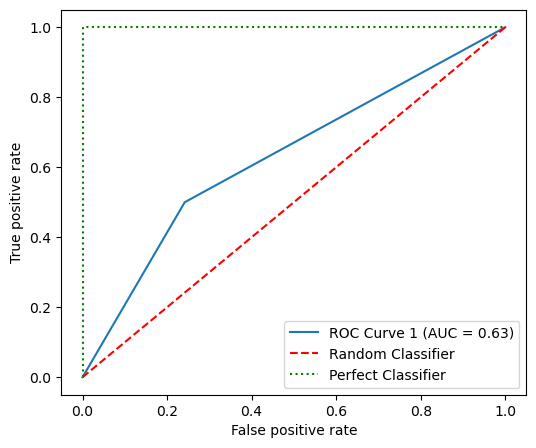

In [86]:
fpr , tpr , _ = roc_curve(y_test, y_pred )
auc = roc_auc_score(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

## ada boost

ada boost without grid search

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
ada = AdaBoostClassifier(n_estimators = 5, learning_rate = 1)

ada.fit(x_train, y_train)
pred_ada = ada.predict(x_test)

In [89]:
acc_ada = accuracy_score(y_test, pred_ada)

print("Accuracy is :", acc_ada)
print(confusion_matrix(y_test, pred_ada))
print(classification_report(y_test, pred_ada))

Accuracy is : 0.5827338129496403
[[55 36]
 [22 26]]
              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65        91
         1.0       0.42      0.54      0.47        48

    accuracy                           0.58       139
   macro avg       0.57      0.57      0.56       139
weighted avg       0.61      0.58      0.59       139



In [90]:
error_rate=[]
for i in range(1,30):
        iteration_error=[]
        ada = AdaBoostClassifier(n_estimators=i, learning_rate = 1)
        ada.fit(x_train,y_train)
        pred_i = ada.predict(x_test)
        iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))

Text(0, 0.5, 'Error Rate')

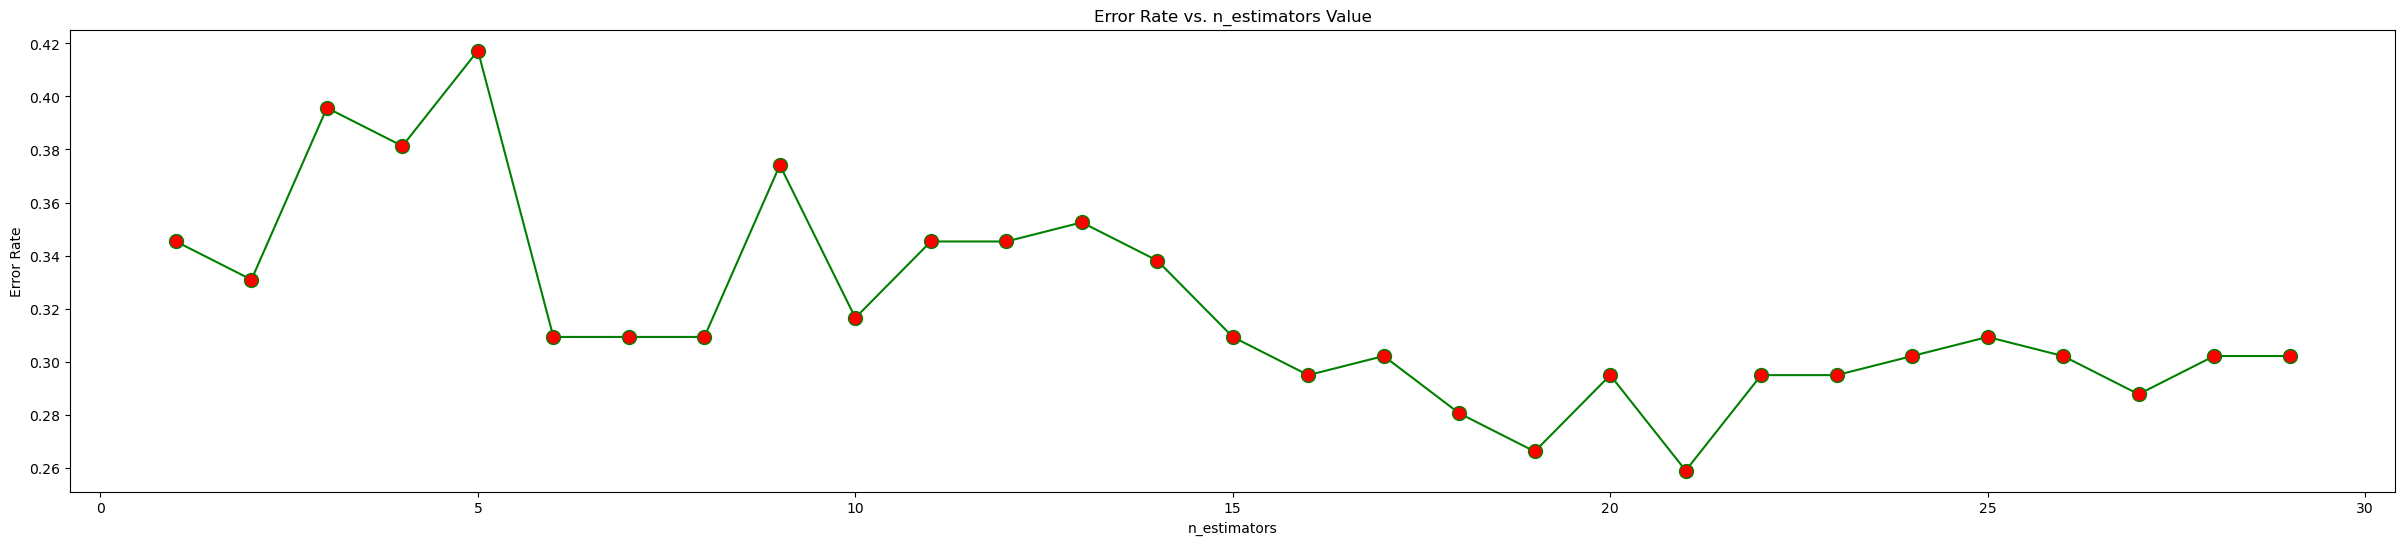

In [91]:
plt.figure(figsize=(30,6))
plt.plot(range(1, 30),error_rate,color='green', linestyle='-', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')

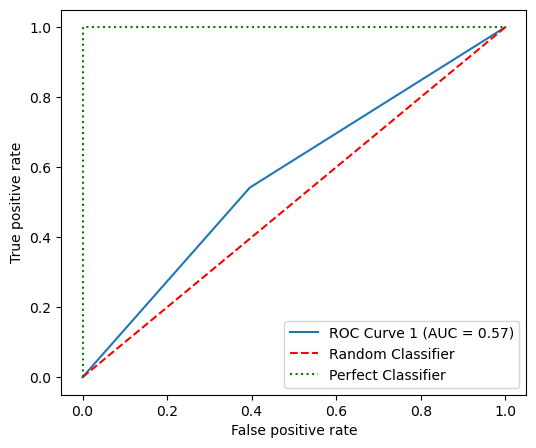

In [92]:
fpr , tpr , _ = roc_curve(y_test, pred_ada )
auc = roc_auc_score(y_test, pred_ada)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

ada boost with grid search

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create the AdaBoost classifier
ada = AdaBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10,20,50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create the grid search object
grid_ada = GridSearchCV(ada, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_ada.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_ada.best_params_)

# Build the AdaBoost model with the best hyperparameters
best_ada = AdaBoostClassifier(**grid_ada.best_params_)
best_ada.fit(x_train, y_train)

# Evaluate the model on the test data
y_pred = best_ada.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
acc_ada = accuracy_score(y_test, y_pred)

print("Accuracy is :", acc_ada)

Best hyperparameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.78        91
         1.0       0.58      0.44      0.50        48

    accuracy                           0.70       139
   macro avg       0.66      0.64      0.64       139
weighted avg       0.68      0.70      0.69       139

[[76 15]
 [27 21]]
Accuracy is : 0.697841726618705


better accuracy

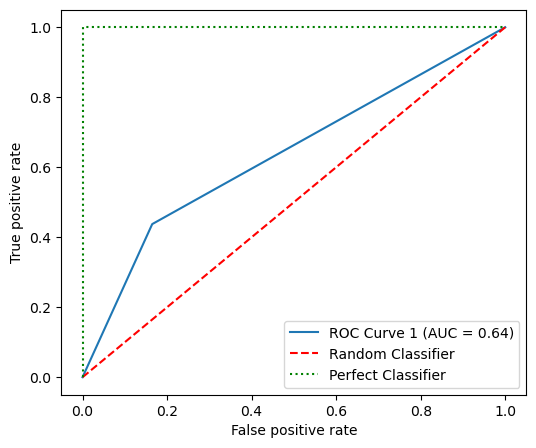

In [94]:
fpr , tpr , _ = roc_curve(y_test, y_pred )
auc = roc_auc_score(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

## bagging

bagging without grid search

In [95]:
from sklearn.ensemble import BaggingClassifier

In [96]:
bag = BaggingClassifier()

bag.fit(x_train, y_train)
pred_bag = bag.predict(x_test)

In [97]:
acc_bag = accuracy_score(y_test, pred_bag)
print("Accuracy is :", acc_bag)
print(confusion_matrix(y_test, pred_bag))
print(classification_report(y_test, pred_bag))

Accuracy is : 0.697841726618705
[[78 13]
 [29 19]]
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79        91
         1.0       0.59      0.40      0.48        48

    accuracy                           0.70       139
   macro avg       0.66      0.63      0.63       139
weighted avg       0.68      0.70      0.68       139



In [98]:
error_rate=[]
for i in range(1,30):
        iteration_error=[]
        bag = BaggingClassifier(n_estimators=i)
        bag.fit(x_train,y_train)
        pred_i = bag.predict(x_test)
        iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))

Text(0, 0.5, 'Error Rate')

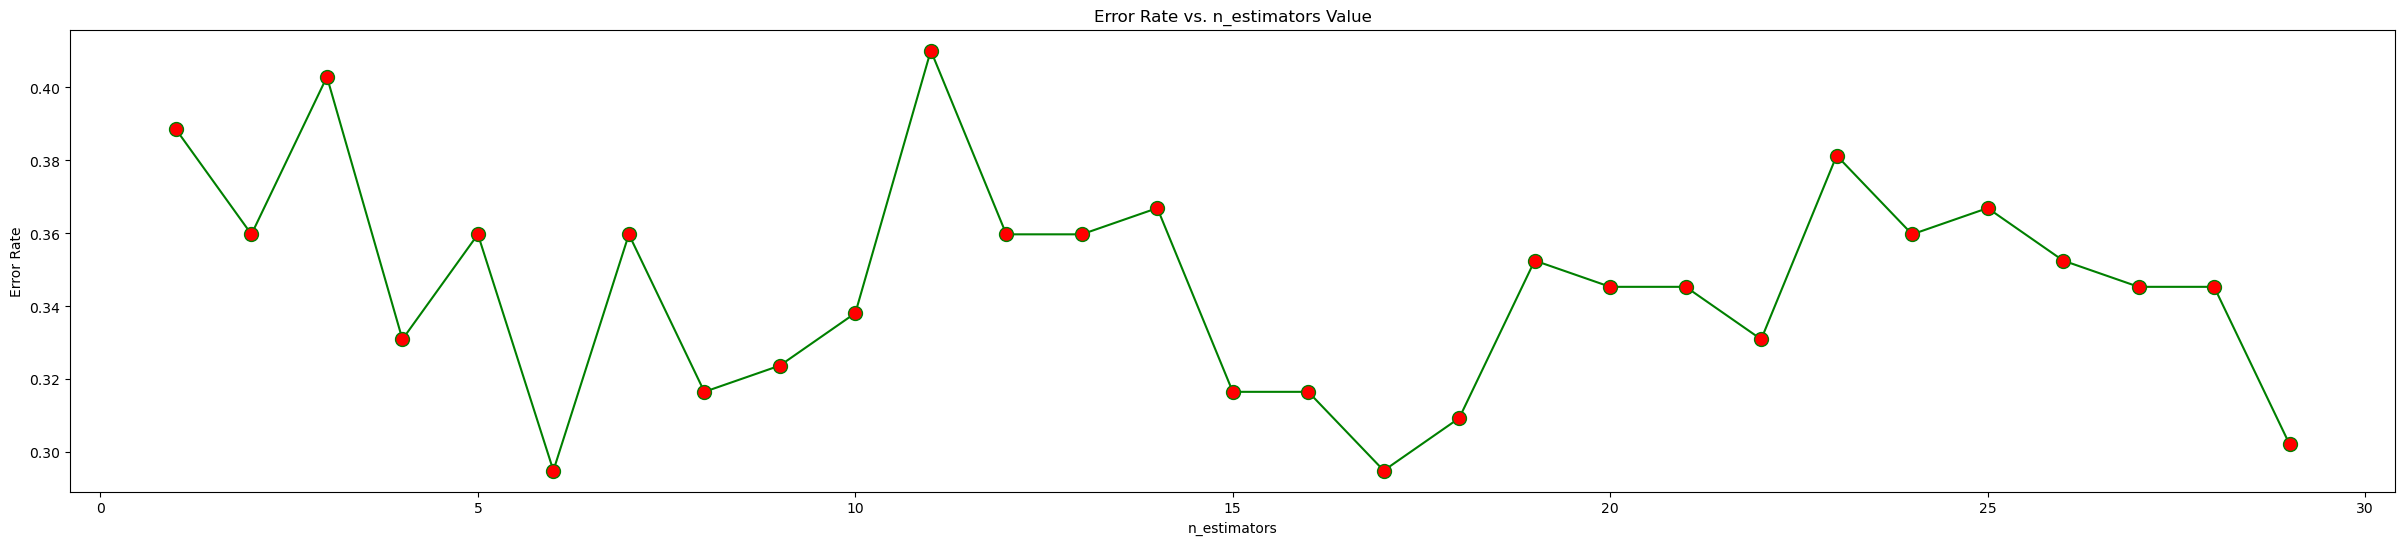

In [99]:
plt.figure(figsize=(30,6))
plt.plot(range(1, 30),error_rate,color='green', linestyle='-', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')

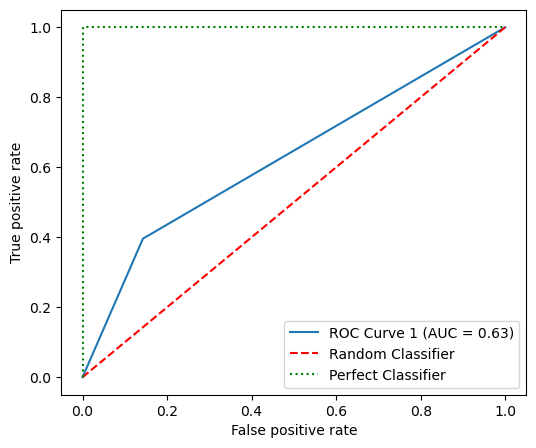

In [100]:
fpr , tpr , _ = roc_curve(y_test, pred_bag )
auc = roc_auc_score(y_test, pred_bag)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

bagging with grid search

In [101]:
base_estimator = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator)

In [102]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

In [103]:
grid_search = GridSearchCV(
    bagging_model, 
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [104]:
best_params = grid_search.best_params_
bagging_model.set_params(**best_params)
bagging_model.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=100)

In [105]:
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
acc_bag = accuracy_score(y_test, y_pred)
print("Accuracy is :", acc_bag)

              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        91
         1.0       0.54      0.44      0.48        48

    accuracy                           0.68       139
   macro avg       0.63      0.62      0.62       139
weighted avg       0.66      0.68      0.67       139

[[73 18]
 [27 21]]
Accuracy is : 0.6762589928057554


lower accuracy

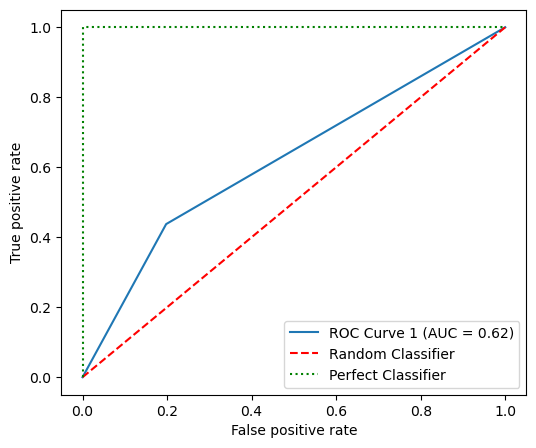

In [106]:
fpr , tpr , _ = roc_curve(y_test, y_pred )
auc = roc_auc_score(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

---

## kfold cross validation 

In [107]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [108]:
param_grid = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
             }

In [109]:
kf = KFold(n_splits=3, random_state=7,shuffle=True)

In [110]:
svm = SVC()

In [111]:
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy')

In [112]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Best score:  0.7553651782623745


In [113]:
# Use the best hyperparameters to train a model
best_params = grid_search.best_params_
svm_best = SVC(**best_params)
svm_best.fit(x_train,y_train)

SVC(C=1, degree=1, gamma=1, kernel='poly')

In [114]:
# Evaluate the model using k-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_best, x_train, y_train, cv=kf, scoring='accuracy')
print("Mean accuracy: ", scores.mean())

Mean accuracy:  0.7553651782623745


In [115]:
y_hat = svm_best.predict(x_test)

In [116]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        91
         1.0       0.56      0.48      0.52        48

    accuracy                           0.69       139
   macro avg       0.65      0.64      0.64       139
weighted avg       0.68      0.69      0.68       139



Text(0.5, 23.52222222222222, 'Predicted')

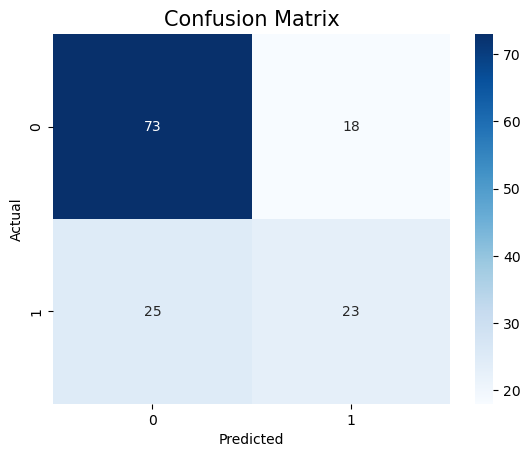

In [117]:
conf_matrix = confusion_matrix(y_test,y_hat)
sns.heatmap(conf_matrix,annot=True,cmap='Blues')
plt.title('Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')

---

## over sampling

in the target variable we witnessed that one class is more than half of the other class but we didnt over sample it because it didnt seem to be necessary but could it change the performance? lets do it and test if it does have effect on SVM or not

In [118]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of the RandomOverSampler class
oversampler = RandomOverSampler()

# Fit and transform the data
x_resampled, y_resampled = oversampler.fit_resample(x_train, y_train)

In [119]:
param_dict = {"C": [1, 10, 50, 100, 200, 300],
             "kernel" :['lnear', 'poly'],
              "gamma": [0.001, 0.01, 0.1, 1]
}

grid_svm = GridSearchCV(svm, param_grid = param_dict, verbose = 1, n_jobs = -1)
grid_svm.fit(x_resampled, y_resampled)

print('best parameter set is:',grid_svm.best_params_)
best_C = grid_svm.best_params_["C"]
best_kernel = grid_svm.best_params_['kernel']
best_gamma = grid_svm.best_params_['gamma']

svm = SVC(C = best_C, kernel = best_kernel, gamma = best_gamma )
svm.fit(x_resampled, y_resampled)
pred_svm = svm.predict(x_test)

print('with best parameter set used for SVM: ')
acc_svm = accuracy_score(y_test, pred_svm)
print("Accuracy is :", acc_svm)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best parameter set is: {'C': 200, 'gamma': 1, 'kernel': 'poly'}
with best parameter set used for SVM: 
Accuracy is : 0.6258992805755396
[[63 28]
 [24 24]]
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71        91
         1.0       0.46      0.50      0.48        48

    accuracy                           0.63       139
   macro avg       0.59      0.60      0.59       139
weighted avg       0.63      0.63      0.63       139



worse results

# Feature Selection

In [7]:
df.columns

Index(['CLASS', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age'],
      dtype='object')

In [8]:
X = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age']]
y = df['CLASS']

## filter

### chi2

In [9]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func = chi2, k = 5)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['sbp', 'tobacco', 'adiposity', 'alcohol', 'age'], dtype='object')

### ANOVA F-value

In [10]:
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func = f_classif, k = 5)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['tobacco', 'ldl', 'adiposity', 'famhist', 'age'], dtype='object')

## Wrapper

### Forward Feature Selection

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

SFS_Forward = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 4, direction ='forward')
SFS_Forward.fit(X, y)
X.columns[SFS_Forward.get_support()]

Index(['tobacco', 'adiposity', 'famhist', 'age'], dtype='object')

### Backward Feature Selection

In [13]:
dtc=DecisionTreeClassifier()
SFS_Backward = SequentialFeatureSelector(estimator=dtc, n_features_to_select = 4, direction ='backward')
SFS_Backward.fit(X, y)
X.columns[SFS_Backward.get_support()]

Index(['ldl', 'adiposity', 'famhist', 'age'], dtype='object')

### Recursive Feature Elimination (RFE)

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression# #Selecting the Best important features according to Logistic Regression
import warnings
warnings.filterwarnings('ignore')
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 4)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['tobacco', 'ldl', 'famhist', 'age'], dtype='object')

## Embedding

Best alpha using built-in LassoCV: 0.005179
Best score using built-in LassoCV: 0.235872
Lasso picked 9 variables and eliminated the other 0 variables


obesity     -0.021299
alcohol     -0.000428
sbp          0.002656
adiposity    0.004188
typea        0.012157
age          0.013986
tobacco      0.032825
ldl          0.065514
famhist      0.324349
dtype: float64

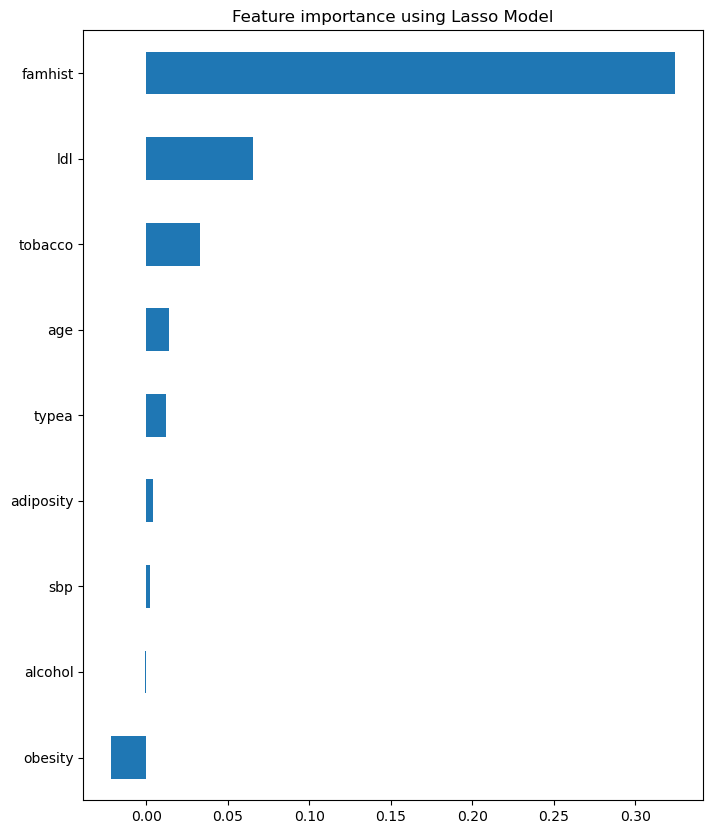

In [17]:
from sklearn.linear_model import RidgeCV, LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
imp_coef

## Other

###  Feature Importance

[0.1141182  0.1370074  0.11733467 0.09900311 0.06552559 0.10620072
 0.08638864 0.09954153 0.17488014]


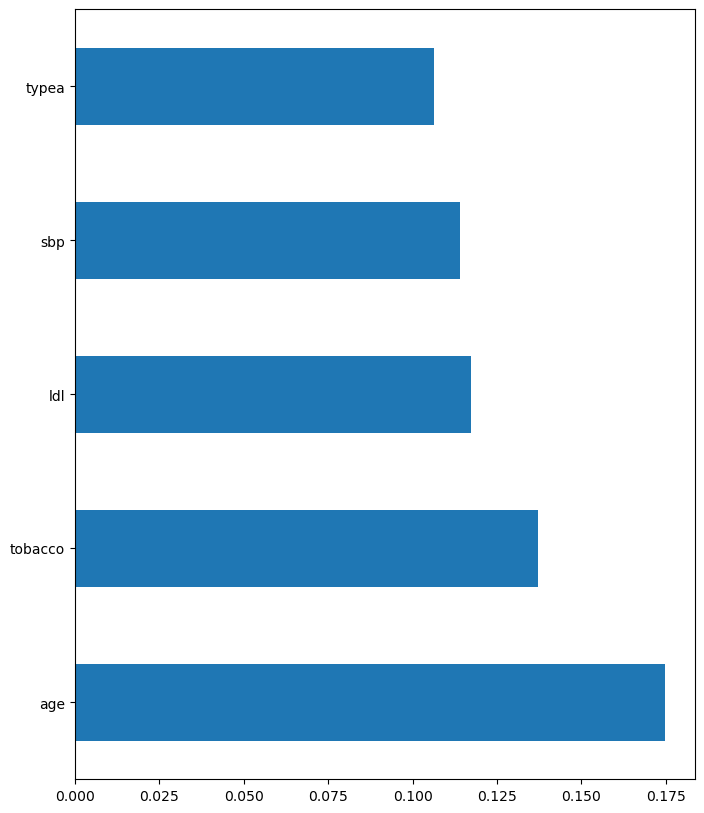

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=5)
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Thank you for your attention